In [1]:
%pylab inline
import os
from collections import Counter
from itertools import product
import random
import tensorflow as tf
tf.__version__


Populating the interactive namespace from numpy and matplotlib


'1.4.1'

## Dataset Generation

slot_api slot_parameters

'weather' 'weather.city' 'weather.date'

'flight'  'flight.depart_city' 'flight.arrival_city' 'flight.depart_date' 'flight.airline_type'

'train'  'train.depart_city' 'train.arrival_city' 'train.depart_date' 'train.train_type'

#### Entities

In [2]:
provences = ['北京市', '天津市', '上海市', '重庆市', 
             '河北省', '山西省', '辽宁省', '吉林省', '江苏省', '浙江省', '安徽省', '福建省', '江西省', '河南省', '湖北省',  '山东省',
             '湖南省', '广东省', '海南省', '四川省', '贵州省', '云南省', '陕西省', '甘肃省', '青海省','黑龙江省', '台湾省', 
             '内蒙古自治区', '广西壮族自治区', '西藏自治区', '宁夏回族自治区', '新疆维吾尔自治区', '香港特别行政区', '澳门特别行政区']

cities = ['石家庄市', '唐山市', '秦皇岛市', '邯郸市', '邢台市', '保定市', '张家口市', '承德市', '沧州市', '廊坊市', '衡水市', '太原市', 
          '大同市', '阳泉市', '长治市', '晋城市', '朔州市', '晋中市', '运城市', '忻州市', '临汾市', '吕梁市', '呼和浩特市', '包头市', 
          '乌海市', '赤峰市', '通辽市', '鄂尔多斯市', '呼伦贝尔市', '巴彦淖尔市', '乌兰察布市', '克拉玛依市', '乌鲁木齐市','西宁市',
          '沈阳市', '大连市', '鞍山市', '抚顺市', '本溪市', '丹东市', '锦州市', '营口市', '阜新市', '辽阳市', '盘锦市', '铁岭市', '朝阳市', 
          '葫芦岛市', '长春市', '吉林市', '四平市', '辽源市', '通化市', '白山市', '松原市', '白城市', '哈尔滨市', '固原市', '中卫市', 
          '齐齐哈尔市', '鸡西市', '鹤岗市', '双鸭山市', '大庆市', '伊春市', '佳木斯市', '七台河市', '牡丹江市', '黑河市', '绥化市', '酒泉市', 
          '南京市', '无锡市', '徐州市', '常州市', '苏州市', '南通市', '连云港市', '淮安市', '盐城市', '扬州市', '镇江市', '庆阳市', '定西市',
          '泰州市', '宿迁市', '杭州市', '宁波市', '温州市', '嘉兴市', '湖州市', '绍兴市', '金华市', '衢州市', '舟山市', '台州市', '丽水市', 
          '合肥市', '芜湖市', '蚌埠市', '淮南市', '马鞍山市', '淮北市', '铜陵市', '安庆市', '黄山市', '滁州市', '阜阳市', '宿州市', '六安市', 
          '亳州市', '池州市', '宣城市', '福州市', '厦门市', '莆田市', '三明市', '泉州市', '漳州市', '南平市', '龙岩市', '宁德市', '南昌市', 
          '景德镇市', '萍乡市', '九江市', '新余市', '鹰潭市', '赣州市', '吉安市', '宜春市', '抚州市', '上饶市', '济南市', '青岛市', '淄博市', 
          '枣庄市', '东营市', '烟台市', '潍坊市', '济宁市', '泰安市', '威海市', '日照市', '莱芜市', '临沂市', '德州市', '聊城市', '滨州市', 
          '菏泽市', '郑州市', '开封市', '洛阳市', '平顶山市', '安阳市', '鹤壁市', '新乡市', '焦作市', '濮阳市', '许昌市', '漯河市', '三门峡市', 
          '南阳市', '商丘市', '信阳市', '周口市', '驻马店市', '武汉市', '黄石市', '十堰市', '宜昌市', '襄阳市', '鄂州市', '银川市', '石嘴山市', 
          '荆门市', '孝感市', '荆州市', '黄冈市', '咸宁市', '随州市', '长沙市', '株洲市', '湘潭市', '兰州市', '嘉峪关市', '海东市', '拉萨市', 
          '衡阳市', '邵阳市', '岳阳市', '常德市', '张家界市', '益阳市', '郴州市', '永州市', '怀化市', '娄底市', '广州市', '吴忠市', '陇南市', 
          '韶关市', '深圳市', '珠海市', '汕头市', '佛山市', '江门市', '湛江市', '茂名市', '肇庆市', '惠州市', '梅州市', '汕尾市', '河源市', 
          '阳江市', '清远市', '东莞市', '中山市', '潮州市', '揭阳市', '云浮市', '南宁市', '柳州市', '桂林市', '梧州市', '北海市', '防城港市', 
          '钦州市', '贵港市', '玉林市', '百色市', '贺州市', '河池市', '来宾市', '崇左市', '海口市', '三亚市', '三沙市', '榆林市', '安康市', 
          '成都市', '自贡市', '攀枝花市', '泸州市', '德阳市', '绵阳市', '广元市', '遂宁市', '内江市', '乐山市', '南充市', '眉山市', '宜宾市', 
          '广安市', '达州市', '雅安市', '巴中市', '资阳市', '贵阳市', '六盘水市', '遵义市', '安顺市', '毕节市', '铜仁市', '昆明市', '曲靖市', 
          '西安市', '铜川市', '宝鸡市', '咸阳市', '渭南市', '延安市', '汉中市', '玉溪市', '保山市', '昭通市', '丽江市', '普洱市', '临沧市', 
          '商洛市', '金昌市', '白银市', '天水市', '武威市', '张掖市', '平凉市', 
         ]
#            '兴安盟', '锡林郭勒盟', '阿拉善盟', '大兴安岭地区', '吐鲁番地区', '哈密地区', '山南地区', '日喀则地区', '那曲地区', '阿里地区', 
#           '昌都地区', '林芝地区', '喀什地区', '和田地区', '阿克苏地区', '塔城地区', '阿勒泰地区', '阿勒泰地区', '喀什地区', '和田地区', 
#           '伊犁哈萨克自治州', '红河哈尼族彝族自治州', '黔西南布依族苗族自治州', '黔东南苗族侗族自治州', '黔南布依族苗族自治州', 
#           '湘西土家族苗族自治州', '楚雄彝族自治州', '西双版纳傣族自治州', '大理白族自治州', '德宏傣族景颇族自治州', '克孜勒苏柯尔克孜自治州',
#            '怒江傈僳族自治州', '迪庆藏族自治州', '文山壮族苗族自治州', '恩施土家族苗族自治州', '伊犁哈萨克自治州', '果洛藏族自治州'
#           '甘南藏族自治州', '阿坝藏族羌族自治州', '甘孜藏族自治州', '凉山彝族自治州', '海北藏族自治州', '黄南藏族自治州', '海西蒙古族藏族自治州',  
#           '临夏回族自治州', '昌吉回族自治州', '博尔塔拉蒙古自治州', '巴音郭楞蒙古自治州', '玉树藏族自治州', '海南藏族自治州', '延边朝鲜族自治州']

districts = ['东城区', '西城区', '朝阳区', '丰台区', '石景山区', '海淀区', '门头沟区', '房山区', '通州区', '顺义区', '昌平区', '大兴区', '怀柔区', '平谷区', '密云县', '延庆县', '和平区', '河东区', '河西区', '南开区', '河北区', '红桥区', '东丽区', '西青区', '津南区', '北辰区', '武清区', '宝坻区', '滨海新区', '宁河县', '静海县', '蓟县', '长安区', '桥东区', '桥西区', '新华区', '井陉矿区', '裕华区', '井陉县', '正定县', '栾城县', '行唐县', '灵寿县', '高邑县', '深泽县', '赞皇县', '无极县', '平山县', '元氏县', '赵县', '辛集市', '藁城市', '晋州市', '新乐市', '鹿泉市', '路南区', '路北区', '古冶区', '开平区', '丰南区', '丰润区', '曹妃甸区', '滦县', '滦南县', '乐亭县', '迁西县', '玉田县', '遵化市', '迁安市', '海港区', '山海关区', '北戴河区', '青龙满族自治县', '昌黎县', '抚宁县', '卢龙县', '邯山区', '丛台区', '复兴区', '峰峰矿区', '邯郸县', '临漳县', '成安县', '大名县', '涉县', '磁县', '肥乡县', '永年县', '邱县', '鸡泽县', '广平县', '馆陶县', '魏县', '曲周县', '武安市', '桥东区', '桥西区', '邢台县', '临城县', '内丘县', '柏乡县', '隆尧县', '任县', '南和县', '宁晋县', '巨鹿县', '新河县', '广宗县', '平乡县', '威县', '清河县', '临西县', '南宫市', '沙河市', '新市区', '北市区', '南市区', '满城县', '清苑县', '涞水县', '阜平县', '徐水县', '定兴县', '唐县', '高阳县', '容城县', '涞源县', '望都县', '安新县', '易县', '曲阳县', '蠡县', '顺平县', '博野县', '雄县', '涿州市', '定州市', '安国市', '高碑店市', '桥东区', '桥西区', '宣化区', '下花园区', '宣化县', '张北县', '康保县', '沽源县', '尚义县', '蔚县', '阳原县', '怀安县', '万全县', '怀来县', '涿鹿县', '赤城县', '崇礼县', '双桥区', '双滦区', '鹰手营子矿区', '承德县', '兴隆县', '平泉县', '滦平县', '隆化县', '丰宁满族自治县', '宽城满族自治县', '围场满族蒙古族自治县', '新华区', '运河区', '沧县', '青县', '东光县', '海兴县', '盐山县', '肃宁县', '南皮县', '吴桥县', '献县', '孟村回族自治县', '泊头市', '任丘市', '黄骅市', '河间市', '安次区', '广阳区', '固安县', '永清县', '香河县', '大城县', '文安县', '大厂回族自治县', '霸州市', '三河市', '桃城区', '枣强县', '武邑县', '武强县', '饶阳县', '安平县', '故城县', '景县', '阜城县', '冀州市', '深州市', '小店区', '迎泽区', '杏花岭区', '尖草坪区', '万柏林区', '晋源区', '清徐县', '阳曲县', '娄烦县', '古交市', '城区', '矿区', '南郊区', '新荣区', '阳高县', '天镇县', '广灵县', '灵丘县', '浑源县', '左云县', '大同县', '城区', '矿区', '郊区', '平定县', '盂县', '城区', '郊区', '长治县', '襄垣县', '屯留县', '平顺县', '黎城县', '壶关县', '长子县', '武乡县', '沁县', '沁源县', '潞城市', '城区', '沁水县', '阳城县', '陵川县', '泽州县', '高平市', '朔城区', '平鲁区', '山阴县', '应县', '右玉县', '怀仁县', '榆次区', '榆社县', '左权县', '和顺县', '昔阳县', '寿阳县', '太谷县', '祁县', '平遥县', '灵石县', '介休市', '盐湖区', '临猗县', '万荣县', '闻喜县', '稷山县', '新绛县', '绛县', '垣曲县', '夏县', '平陆县', '芮城县', '永济市', '河津市', '忻府区', '定襄县', '五台县', '代县', '繁峙县', '宁武县', '静乐县', '神池县', '五寨县', '岢岚县', '河曲县', '保德县', '偏关县', '原平市', '尧都区', '曲沃县', '翼城县', '襄汾县', '洪洞县', '古县', '安泽县', '浮山县', '吉县', '乡宁县', '大宁县', '隰县', '永和县', '蒲县', '汾西县', '侯马市', '霍州市', '离石区', '文水县', '交城县', '兴县', '临县', '柳林县', '石楼县', '岚县', '方山县', '中阳县', '交口县', '孝义市', '汾阳市', '新城区', '回民区', '玉泉区', '赛罕区', '土默特左旗', '托克托县', '和林格尔县', '清水河县', '武川县', '东河区', '昆都仑区', '青山区', '石拐区', '白云鄂博矿区', '九原区', '土默特右旗', '固阳县', '达尔罕茂明安联合旗', '海勃湾区', '海南区', '乌达区', '红山区', '元宝山区', '松山区', '阿鲁科尔沁旗', '巴林左旗', '巴林右旗', '林西县', '克什克腾旗', '翁牛特旗', '喀喇沁旗', '宁城县', '敖汉旗', '科尔沁区', '科尔沁左翼中旗', '科尔沁左翼后旗', '开鲁县', '库伦旗', '奈曼旗', '扎鲁特旗', '霍林郭勒市', '东胜区', '达拉特旗', '准格尔旗', '鄂托克前旗', '鄂托克旗', '杭锦旗', '乌审旗', '伊金霍洛旗', '海拉尔区', '扎赉诺尔区', '阿荣旗', '莫力达瓦达斡尔族自治旗', '鄂伦春自治旗', '鄂温克族自治旗', '陈巴尔虎旗', '新巴尔虎左旗', '新巴尔虎右旗', '满洲里市', '牙克石市', '扎兰屯市', '额尔古纳市', '根河市', '临河区', '五原县', '磴口县', '乌拉特前旗', '乌拉特中旗', '乌拉特后旗', '杭锦后旗', '集宁区', '卓资县', '化德县', '商都县', '兴和县', '凉城县', '察哈尔右翼前旗', '察哈尔右翼中旗', '察哈尔右翼后旗', '四子王旗', '丰镇市', '乌兰浩特市', '阿尔山市', '科尔沁右翼前旗', '科尔沁右翼中旗', '扎赉特旗', '突泉县', '二连浩特市', '锡林浩特市', '阿巴嘎旗', '苏尼特左旗', '苏尼特右旗', '东乌珠穆沁旗', '西乌珠穆沁旗', '太仆寺旗', '镶黄旗', '正镶白旗', '正蓝旗', '多伦县', '阿拉善左旗', '阿拉善右旗', '额济纳旗', '和平区', '沈河区', '大东区', '皇姑区', '铁西区', '苏家屯区', '东陵区', '沈北新区', '于洪区', '辽中县', '康平县', '法库县', '新民市', '中山区', '西岗区', '沙河口区', '甘井子区', '旅顺口区', '金州区', '长海县', '瓦房店市', '普兰店市', '庄河市', '铁东区', '铁西区', '立山区', '千山区', '台安县', '岫岩满族自治县', '海城市', '新抚区', '东洲区', '望花区', '顺城区', '抚顺县', '新宾满族自治县', '清原满族自治县', '平山区', '溪湖区', '明山区', '南芬区', '本溪满族自治县', '桓仁满族自治县', '元宝区', '振兴区', '振安区', '宽甸满族自治县', '东港市', '凤城市', '古塔区', '凌河区', '太和区', '黑山县', '义县', '凌海市', '北镇市', '站前区', '西市区', '鲅鱼圈区', '老边区', '盖州市', '大石桥市', '海州区', '新邱区', '太平区', '清河门区', '细河区', '阜新蒙古族自治县', '彰武县', '白塔区', '文圣区', '宏伟区', '弓长岭区', '太子河区', '辽阳县', '灯塔市', '双台子区', '兴隆台区', '大洼县', '盘山县', '银州区', '清河区', '铁岭县', '西丰县', '昌图县', '调兵山市', '开原市', '双塔区', '龙城区', '朝阳县', '建平县', '喀喇沁左翼蒙古族自治县', '北票市', '凌源市', '连山区', '龙港区', '南票区', '绥中县', '建昌县', '兴城市', '南关区', '宽城区', '朝阳区', '二道区', '绿园区', '双阳区', '农安县', '九台市', '榆树市', '德惠市', '昌邑区', '龙潭区', '船营区', '丰满区', '永吉县', '蛟河市', '桦甸市', '舒兰市', '磐石市', '铁西区', '铁东区', '梨树县', '伊通满族自治县', '公主岭市', '双辽市', '龙山区', '西安区', '东丰县', '东辽县', '东昌区', '二道江区', '通化县', '辉南县', '柳河县', '梅河口市', '集安市', '浑江区', '江源区', '抚松县', '靖宇县', '长白朝鲜族自治县', '临江市', '宁江区', '前郭尔罗斯蒙古族自治县', '长岭县', '乾安县', '扶余市', '洮北区', '镇赉县', '通榆县', '洮南市', '大安市', '延吉市', '图们市', '敦化市', '珲春市', '龙井市', '和龙市', '汪清县', '安图县', '道里区', '南岗区', '道外区', '平房区', '松北区', '香坊区', '呼兰区', '阿城区', '依兰县', '方正县', '宾县', '巴彦县', '木兰县', '通河县', '延寿县', '双城市', '尚志市', '五常市', '龙沙区', '建华区', '铁锋区', '昂昂溪区', '富拉尔基区', '碾子山区', '梅里斯达斡尔族区', '龙江县', '依安县', '泰来县', '甘南县', '富裕县', '克山县', '克东县', '拜泉县', '讷河市', '鸡冠区', '恒山区', '滴道区', '梨树区', '城子河区', '麻山区', '鸡东县', '虎林市', '密山市', '向阳区', '工农区', '南山区', '兴安区', '东山区', '兴山区', '萝北县', '绥滨县', '尖山区', '岭东区', '四方台区', '宝山区', '集贤县', '友谊县', '宝清县', '饶河县', '萨尔图区', '龙凤区', '让胡路区', '红岗区', '大同区', '肇州县', '肇源县', '林甸县', '杜尔伯特蒙古族自治县', '伊春区', '南岔区', '友好区', '西林区', '翠峦区', '新青区', '美溪区', '金山屯区', '五营区', '乌马河区', '汤旺河区', '带岭区', '乌伊岭区', '红星区', '上甘岭区', '嘉荫县', '铁力市', '向阳区', '前进区', '东风区', '郊区', '桦南县', '桦川县', '汤原县', '抚远县', '同江市', '富锦市', '新兴区', '桃山区', '茄子河区', '勃利县', '东安区', '阳明区', '爱民区', '西安区', '东宁县', '林口县', '绥芬河市', '海林市', '宁安市', '穆棱市', '爱辉区', '嫩江县', '逊克县', '孙吴县', '北安市', '五大连池市', '北林区', '望奎县', '兰西县', '青冈县', '庆安县', '明水县', '绥棱县', '安达市', '肇东市', '海伦市', '呼玛县', '塔河县', '漠河县', '黄浦区', '徐汇区', '长宁区', '静安区', '普陀区', '闸北区', '虹口区', '杨浦区', '闵行区', '宝山区', '嘉定区', '浦东新区', '金山区', '松江区', '青浦区', '奉贤区', '崇明县', '玄武区', '秦淮区', '建邺区', '鼓楼区', '浦口区', '栖霞区', '雨花台区', '江宁区', '六合区', '溧水区', '高淳区', '崇安区', '南长区', '北塘区', '锡山区', '惠山区', '滨湖区', '江阴市', '宜兴市', '鼓楼区', '云龙区', '贾汪区', '泉山区', '铜山区', '丰县', '沛县', '睢宁县', '新沂市', '邳州市', '天宁区', '钟楼区', '戚墅堰区', '新北区', '武进区', '溧阳市', '金坛市', '虎丘区', '吴中区', '相城区', '姑苏区', '吴江区', '常熟市', '张家港市', '昆山市', '太仓市', '崇川区', '港闸区', '通州区', '海安县', '如东县', '启东市', '如皋市', '海门市', '连云区', '新浦区', '海州区', '赣榆县', '东海县', '灌云县', '灌南县', '清河区', '淮安区', '淮阴区', '清浦区', '涟水县', '洪泽县', '盱眙县', '金湖县', '亭湖区', '盐都区', '响水县', '滨海县', '阜宁县', '射阳县', '建湖县', '东台市', '大丰市', '广陵区', '邗江区', '江都区', '宝应县', '仪征市', '高邮市', '京口区', '润州区', '丹徒区', '丹阳市', '扬中市', '句容市', '海陵区', '高港区', '姜堰区', '兴化市', '靖江市', '泰兴市', '宿城区', '宿豫区', '沭阳县', '泗阳县', '泗洪县', '上城区', '下城区', '江干区', '拱墅区', '西湖区', '滨江区', '萧山区', '余杭区', '桐庐县', '淳安县', '建德市', '富阳市', '临安市', '海曙区', '江东区', '江北区', '北仑区', '镇海区', '鄞州区', '象山县', '宁海县', '余姚市', '慈溪市', '奉化市', '鹿城区', '龙湾区', '瓯海区', '洞头县', '永嘉县', '平阳县', '苍南县', '文成县', '泰顺县', '瑞安市', '乐清市', '南湖区', '秀洲区', '嘉善县', '海盐县', '海宁市', '平湖市', '桐乡市', '吴兴区', '南浔区', '德清县', '长兴县', '安吉县', '越城区', '绍兴县', '新昌县', '诸暨市', '上虞市', '嵊州市', '婺城区', '金东区', '武义县', '浦江县', '磐安县', '兰溪市', '义乌市', '东阳市', '永康市', '柯城区', '衢江区', '常山县', '开化县', '龙游县', '江山市', '定海区', '普陀区', '岱山县', '嵊泗县', '椒江区', '黄岩区', '路桥区', '玉环县', '三门县', '天台县', '仙居县', '温岭市', '临海市', '莲都区', '青田县', '缙云县', '遂昌县', '松阳县', '云和县', '庆元县', '景宁畲族自治县', '龙泉市', '瑶海区', '庐阳区', '蜀山区', '包河区', '长丰县', '肥东县', '肥西县', '庐江县', '巢湖市', '镜湖区', '弋江区', '鸠江区', '三山区', '芜湖县', '繁昌县', '南陵县', '无为县', '龙子湖区', '蚌山区', '禹会区', '淮上区', '怀远县', '五河县', '固镇县', '大通区', '田家庵区', '谢家集区', '八公山区', '潘集区', '凤台县', '花山区', '雨山区', '博望区', '当涂县', '含山县', '和县', '杜集区', '相山区', '烈山区', '濉溪县', '铜官山区', '狮子山区', '郊区', '铜陵县', '迎江区', '大观区', '宜秀区', '怀宁县', '枞阳县', '潜山县', '太湖县', '宿松县', '望江县', '岳西县', '桐城市', '屯溪区', '黄山区', '徽州区', '歙县', '休宁县', '黟县', '祁门县', '琅琊区', '南谯区', '来安县', '全椒县', '定远县', '凤阳县', '天长市', '明光市', '颍州区', '颍东区', '颍泉区', '临泉县', '太和县', '阜南县', '颍上县', '界首市', '埇桥区', '砀山县', '萧县', '灵璧县', '泗县', '金安区', '裕安区', '寿县', '霍邱县', '舒城县', '金寨县', '霍山县', '谯城区', '涡阳县', '蒙城县', '利辛县', '贵池区', '东至县', '石台县', '青阳县', '宣州区', '郎溪县', '广德县', '泾县', '绩溪县', '旌德县', '宁国市', '鼓楼区', '台江区', '仓山区', '马尾区', '晋安区', '闽侯县', '连江县', '罗源县', '闽清县', '永泰县', '平潭县', '福清市', '长乐市', '思明区', '海沧区', '湖里区', '集美区', '同安区', '翔安区', '城厢区', '涵江区', '荔城区', '秀屿区', '仙游县', '梅列区', '三元区', '明溪县', '清流县', '宁化县', '大田县', '尤溪县', '沙县', '将乐县', '泰宁县', '建宁县', '永安市', '鲤城区', '丰泽区', '洛江区', '泉港区', '惠安县', '安溪县', '永春县', '德化县', '金门县', '石狮市', '晋江市', '南安市', '芗城区', '龙文区', '云霄县', '漳浦县', '诏安县', '长泰县', '东山县', '南靖县', '平和县', '华安县', '龙海市', '延平区', '顺昌县', '浦城县', '光泽县', '松溪县', '政和县', '邵武市', '武夷山市', '建瓯市', '建阳市', '新罗区', '长汀县', '永定县', '上杭县', '武平县', '连城县', '漳平市', '蕉城区', '霞浦县', '古田县', '屏南县', '寿宁县', '周宁县', '柘荣县', '福安市', '福鼎市', '东湖区', '西湖区', '青云谱区', '湾里区', '青山湖区', '南昌县', '新建县', '安义县', '进贤县', '昌江区', '珠山区', '浮梁县', '乐平市', '安源区', '湘东区', '莲花县', '上栗县', '芦溪县', '庐山区', '浔阳区', '九江县', '武宁县', '修水县', '永修县', '德安县', '星子县', '都昌县', '湖口县', '彭泽县', '瑞昌市', '共青城市', '渝水区', '分宜县', '月湖区', '余江县', '贵溪市', '章贡区', '赣县', '信丰县', '大余县', '上犹县', '崇义县', '安远县', '龙南县', '定南县', '全南县', '宁都县', '于都县', '兴国县', '会昌县', '寻乌县', '石城县', '瑞金市', '南康市', '吉州区', '青原区', '吉安县', '吉水县', '峡江县', '新干县', '永丰县', '泰和县', '遂川县', '万安县', '安福县', '永新县', '井冈山市', '袁州区', '奉新县', '万载县', '上高县', '宜丰县', '靖安县', '铜鼓县', '丰城市', '樟树市', '高安市', '临川区', '南城县', '黎川县', '南丰县', '崇仁县', '乐安县', '宜黄县', '金溪县', '资溪县', '东乡县', '广昌县', '信州区', '上饶县', '广丰县', '玉山县', '铅山县', '横峰县', '弋阳县', '余干县', '鄱阳县', '万年县', '婺源县', '德兴市', '历下区', '市中区', '槐荫区', '天桥区', '历城区', '长清区', '平阴县', '济阳县', '商河县', '章丘市', '市南区', '市北区', '黄岛区', '崂山区', '李沧区', '城阳区', '胶州市', '即墨市', '平度市', '莱西市', '淄川区', '张店区', '博山区', '临淄区', '周村区', '桓台县', '高青县', '沂源县', '市中区', '薛城区', '峄城区', '台儿庄区', '山亭区', '滕州市', '东营区', '河口区', '垦利县', '利津县', '广饶县', '芝罘区', '福山区', '牟平区', '莱山区', '长岛县', '龙口市', '莱阳市', '莱州市', '蓬莱市', '招远市', '栖霞市', '海阳市', '潍城区', '寒亭区', '坊子区', '奎文区', '临朐县', '昌乐县', '青州市', '诸城市', '寿光市', '安丘市', '高密市', '昌邑市', '市中区', '任城区', '微山县', '鱼台县', '金乡县', '嘉祥县', '汶上县', '泗水县', '梁山县', '曲阜市', '兖州市', '邹城市', '泰山区', '岱岳区', '宁阳县', '东平县', '新泰市', '肥城市', '环翠区', '文登市', '荣成市', '乳山市', '东港区', '岚山区', '五莲县', '莒县', '莱城区', '钢城区', '兰山区', '罗庄区', '河东区', '沂南县', '郯城县', '沂水县', '苍山县', '费县', '平邑县', '莒南县', '蒙阴县', '临沭县', '德城区', '陵县', '宁津县', '庆云县', '临邑县', '齐河县', '平原县', '夏津县', '武城县', '乐陵市', '禹城市', '东昌府区', '阳谷县', '莘县', '茌平县', '东阿县', '冠县', '高唐县', '临清市', '滨城区', '惠民县', '阳信县', '无棣县', '沾化县', '博兴县', '邹平县', '牡丹区', '曹县', '单县', '成武县', '巨野县', '郓城县', '鄄城县', '定陶县', '东明县', '中原区', '二七区', '管城回族区', '金水区', '上街区', '惠济区', '中牟县', '巩义市', '荥阳市', '新密市', '新郑市', '登封市', '龙亭区', '顺河回族区', '鼓楼区', '禹王台区', '金明区', '杞县', '通许县', '尉氏县', '开封县', '兰考县', '老城区', '西工区', '瀍河回族区', '涧西区', '吉利区', '洛龙区', '孟津县', '新安县', '栾川县', '嵩县', '汝阳县', '宜阳县', '洛宁县', '伊川县', '偃师市', '新华区', '卫东区', '石龙区', '湛河区', '宝丰县', '叶县', '鲁山县', '郏县', '舞钢市', '汝州市', '文峰区', '北关区', '殷都区', '龙安区', '安阳县', '汤阴县', '滑县', '内黄县', '林州市', '鹤山区', '山城区', '淇滨区', '浚县', '淇县', '红旗区', '卫滨区', '凤泉区', '牧野区', '新乡县', '获嘉县', '原阳县', '延津县', '封丘县', '长垣县', '卫辉市', '辉县市', '解放区', '中站区', '马村区', '山阳区', '修武县', '博爱县', '武陟县', '温县', '沁阳市', '孟州市', '华龙区', '清丰县', '南乐县', '范县', '台前县', '濮阳县', '魏都区', '许昌县', '鄢陵县', '襄城县', '禹州市', '长葛市', '源汇区', '郾城区', '召陵区', '舞阳县', '临颍县', '湖滨区', '渑池县', '陕县', '卢氏县', '义马市', '灵宝市', '宛城区', '卧龙区', '南召县', '方城县', '西峡县', '镇平县', '内乡县', '淅川县', '社旗县', '唐河县', '新野县', '桐柏县', '邓州市', '梁园区', '睢阳区', '民权县', '睢县', '宁陵县', '柘城县', '虞城县', '夏邑县', '永城市', '浉河区', '平桥区', '罗山县', '光山县', '新县', '商城县', '固始县', '潢川县', '淮滨县', '息县', '川汇区', '扶沟县', '西华县', '商水县', '沈丘县', '郸城县', '淮阳县', '太康县', '鹿邑县', '项城市', '驿城区', '西平县', '上蔡县', '平舆县', '正阳县', '确山县', '泌阳县', '汝南县', '遂平县', '新蔡县', '济源市', '江岸区', '江汉区', '硚口区', '汉阳区', '武昌区', '青山区', '洪山区', '东西湖区', '汉南区', '蔡甸区', '江夏区', '黄陂区', '新洲区', '黄石港区', '西塞山区', '下陆区', '铁山区', '阳新县', '大冶市', '茅箭区', '张湾区', '郧县', '郧西县', '竹山县', '竹溪县', '房县', '丹江口市', '西陵区', '伍家岗区', '点军区', '猇亭区', '夷陵区', '远安县', '兴山县', '秭归县', '长阳土家族自治县', '五峰土家族自治县', '宜都市', '当阳市', '枝江市', '襄城区', '樊城区', '襄州区', '南漳县', '谷城县', '保康县', '老河口市', '枣阳市', '宜城市', '梁子湖区', '华容区', '鄂城区', '东宝区', '掇刀区', '京山县', '沙洋县', '钟祥市', '孝南区', '孝昌县', '大悟县', '云梦县', '应城市', '安陆市', '汉川市', '沙市区', '荆州区', '公安县', '监利县', '江陵县', '石首市', '洪湖市', '松滋市', '黄州区', '团风县', '红安县', '罗田县', '英山县', '浠水县', '蕲春县', '黄梅县', '麻城市', '武穴市', '咸安区', '嘉鱼县', '通城县', '崇阳县', '通山县', '赤壁市', '曾都区', '随县', '广水市', '恩施市', '利川市', '建始县', '巴东县', '宣恩县', '咸丰县', '来凤县', '鹤峰县', '仙桃市', '潜江市', '天门市', '神农架林区', '芙蓉区', '天心区', '岳麓区', '开福区', '雨花区', '望城区', '长沙县', '宁乡县', '浏阳市', '荷塘区', '芦淞区', '石峰区', '天元区', '株洲县', '攸县', '茶陵县', '炎陵县', '醴陵市', '雨湖区', '岳塘区', '湘潭县', '湘乡市', '韶山市', '珠晖区', '雁峰区', '石鼓区', '蒸湘区', '南岳区', '衡阳县', '衡南县', '衡山县', '衡东县', '祁东县', '耒阳市', '常宁市', '双清区', '大祥区', '北塔区', '邵东县', '新邵县', '邵阳县', '隆回县', '洞口县', '绥宁县', '新宁县', '城步苗族自治县', '武冈市', '岳阳楼区', '云溪区', '君山区', '岳阳县', '华容县', '湘阴县', '平江县', '汨罗市', '临湘市', '武陵区', '鼎城区', '安乡县', '汉寿县', '澧县', '临澧县', '桃源县', '石门县', '津市市', '永定区', '武陵源区', '慈利县', '桑植县', '资阳区', '赫山区', '南县', '桃江县', '安化县', '沅江市', '北湖区', '苏仙区', '桂阳县', '宜章县', '永兴县', '嘉禾县', '临武县', '汝城县', '桂东县', '安仁县', '资兴市', '零陵区', '冷水滩区', '祁阳县', '东安县', '双牌县', '道县', '江永县', '宁远县', '蓝山县', '新田县', '江华瑶族自治县', '鹤城区', '中方县', '沅陵县', '辰溪县', '溆浦县', '会同县', '麻阳苗族自治县', '新晃侗族自治县', '芷江侗族自治县', '靖州苗族侗族自治县', '通道侗族自治县', '洪江市', '娄星区', '双峰县', '新化县', '冷水江市', '涟源市', '吉首市', '泸溪县', '凤凰县', '花垣县', '保靖县', '古丈县', '永顺县', '龙山县', '荔湾区', '越秀区', '海珠区', '天河区', '白云区', '黄埔区', '番禺区', '花都区', '南沙区', '萝岗区', '增城市', '从化市', '武江区', '浈江区', '曲江区', '始兴县', '仁化县', '翁源县', '乳源瑶族自治县', '新丰县', '乐昌市', '南雄市', '罗湖区', '福田区', '南山区', '宝安区', '龙岗区', '盐田区', '香洲区', '斗门区', '金湾区', '龙湖区', '金平区', '濠江区', '潮阳区', '潮南区', '澄海区', '南澳县', '禅城区', '南海区', '顺德区', '三水区', '高明区', '蓬江区', '江海区', '新会区', '台山市', '开平市', '鹤山市', '恩平市', '赤坎区', '霞山区', '坡头区', '麻章区', '遂溪县', '徐闻县', '廉江市', '雷州市', '吴川市', '茂南区', '茂港区', '电白县', '高州市', '化州市', '信宜市', '端州区', '鼎湖区', '广宁县', '怀集县', '封开县', '德庆县', '高要市', '四会市', '惠城区', '惠阳区', '博罗县', '惠东县', '龙门县', '梅江区', '梅县', '大埔县', '丰顺县', '五华县', '平远县', '蕉岭县', '兴宁市', '城区', '海丰县', '陆河县', '陆丰市', '源城区', '紫金县', '龙川县', '连平县', '和平县', '东源县', '江城区', '阳西县', '阳东县', '阳春市', '清城区', '清新区', '佛冈县', '阳山县', '连山壮族瑶族自治县', '连南瑶族自治县', '英德市', '连州市', '湘桥区', '潮安区', '饶平县', '榕城区', '揭东区', '揭西县', '惠来县', '普宁市', '云城区', '新兴县', '郁南县', '云安县', '罗定市', '兴宁区', '青秀区', '江南区', '西乡塘区', '良庆区', '邕宁区', '武鸣县', '隆安县', '马山县', '上林县', '宾阳县', '横县', '城中区', '鱼峰区', '柳南区', '柳北区', '柳江县', '柳城县', '鹿寨县', '融安县', '融水苗族自治县', '三江侗族自治县', '秀峰区', '叠彩区', '象山区', '七星区', '雁山区', '临桂区', '阳朔县', '灵川县', '全州县', '兴安县', '永福县', '灌阳县', '龙胜各族自治县', '资源县', '平乐县', '荔浦县', '恭城瑶族自治县', '万秀区', '长洲区', '龙圩区', '苍梧县', '藤县', '蒙山县', '岑溪市', '海城区', '银海区', '铁山港区', '合浦县', '港口区', '防城区', '上思县', '东兴市', '钦南区', '钦北区', '灵山县', '浦北县', '港北区', '港南区', '覃塘区', '平南县', '桂平市', '玉州区', '福绵区', '容县', '陆川县', '博白县', '兴业县', '北流市', '右江区', '田阳县', '田东县', '平果县', '德保县', '靖西县', '那坡县', '凌云县', '乐业县', '田林县', '西林县', '隆林各族自治县', '八步区', '昭平县', '钟山县', '富川瑶族自治县', '金城江区', '南丹县', '天峨县', '凤山县', '东兰县', '罗城仫佬族自治县', '环江毛南族自治县', '巴马瑶族自治县', '都安瑶族自治县', '大化瑶族自治县', '宜州市', '兴宾区', '忻城县', '象州县', '武宣县', '金秀瑶族自治县', '合山市', '江州区', '扶绥县', '宁明县', '龙州县', '大新县', '天等县', '凭祥市', '秀英区', '龙华区', '琼山区', '美兰区', '西沙群岛', '南沙群岛', '中沙群岛的岛礁及其海域', '五指山市', '琼海市', '儋州市', '文昌市', '万宁市', '东方市', '定安县', '屯昌县', '澄迈县', '临高县', '白沙黎族自治县', '昌江黎族自治县', '乐东黎族自治县', '陵水黎族自治县', '保亭黎族苗族自治县', '琼中黎族苗族自治县', '万州区', '涪陵区', '渝中区', '大渡口区', '江北区', '沙坪坝区', '九龙坡区', '南岸区', '北碚区', '綦江区', '大足区', '渝北区', '巴南区', '黔江区', '长寿区', '江津区', '合川区', '永川区', '南川区', '潼南县', '铜梁县', '荣昌县', '璧山县', '梁平县', '城口县', '丰都县', '垫江县', '武隆县', '忠县', '开县', '云阳县', '奉节县', '巫山县', '巫溪县', '石柱土家族自治县', '秀山土家族苗族自治县', '酉阳土家族苗族自治县', '彭水苗族土家族自治县', '锦江区', '青羊区', '金牛区', '武侯区', '成华区', '龙泉驿区', '青白江区', '新都区', '温江区', '金堂县', '双流县', '郫县', '大邑县', '蒲江县', '新津县', '都江堰市', '彭州市', '邛崃市', '崇州市', '自流井区', '贡井区', '大安区', '沿滩区', '荣县', '富顺县', '东区', '西区', '仁和区', '米易县', '盐边县', '江阳区', '纳溪区', '龙马潭区', '泸县', '合江县', '叙永县', '古蔺县', '旌阳区', '中江县', '罗江县', '广汉市', '什邡市', '绵竹市', '涪城区', '游仙区', '三台县', '盐亭县', '安县', '梓潼县', '北川羌族自治县', '平武县', '江油市', '利州区', '元坝区', '朝天区', '旺苍县', '青川县', '剑阁县', '苍溪县', '船山区', '安居区', '蓬溪县', '射洪县', '大英县', '市中区', '东兴区', '威远县', '资中县', '隆昌县', '市中区', '沙湾区', '五通桥区', '金口河区', '犍为县', '井研县', '夹江县', '沐川县', '峨边彝族自治县', '马边彝族自治县', '峨眉山市', '顺庆区', '高坪区', '嘉陵区', '南部县', '营山县', '蓬安县', '仪陇县', '西充县', '阆中市', '东坡区', '仁寿县', '彭山县', '洪雅县', '丹棱县', '青神县', '翠屏区', '南溪区', '宜宾县', '江安县', '长宁县', '高县', '珙县', '筠连县', '兴文县', '屏山县', '广安区', '前锋区', '岳池县', '武胜县', '邻水县', '华蓥市', '通川区', '达川区', '宣汉县', '开江县', '大竹县', '渠县', '万源市', '雨城区', '名山区', '荥经县', '汉源县', '石棉县', '天全县', '芦山县', '宝兴县', '巴州区', '恩阳区', '通江县', '南江县', '平昌县', '雁江区', '安岳县', '乐至县', '简阳市', '汶川县', '理县', '茂县', '松潘县', '九寨沟县', '金川县', '小金县', '黑水县', '马尔康县', '壤塘县', '阿坝县', '若尔盖县', '红原县', '康定县', '泸定县', '丹巴县', '九龙县', '雅江县', '道孚县', '炉霍县', '甘孜县', '新龙县', '德格县', '白玉县', '石渠县', '色达县', '理塘县', '巴塘县', '乡城县', '稻城县', '得荣县', '西昌市', '木里藏族自治县', '盐源县', '德昌县', '会理县', '会东县', '宁南县', '普格县', '布拖县', '金阳县', '昭觉县', '喜德县', '冕宁县', '越西县', '甘洛县', '美姑县', '雷波县', '南明区', '云岩区', '花溪区', '乌当区', '白云区', '观山湖区', '开阳县', '息烽县', '修文县', '清镇市', '钟山区', '六枝特区', '水城县', '盘县', '红花岗区', '汇川区', '遵义县', '桐梓县', '绥阳县', '正安县', '道真仡佬族苗族自治县', '务川仡佬族苗族自治县', '凤冈县', '湄潭县', '余庆县', '习水县', '赤水市', '仁怀市', '西秀区', '平坝县', '普定县', '镇宁布依族苗族自治县', '关岭布依族苗族自治县', '紫云苗族布依族自治县', '七星关区', '大方县', '黔西县', '金沙县', '织金县', '纳雍县', '威宁彝族回族苗族自治县', '赫章县', '碧江区', '万山区', '江口县', '玉屏侗族自治县', '石阡县', '思南县', '印江土家族苗族自治县', '德江县', '沿河土家族自治县', '松桃苗族自治县', '兴义市', '兴仁县', '普安县', '晴隆县', '贞丰县', '望谟县', '册亨县', '安龙县', '凯里市', '黄平县', '施秉县', '三穗县', '镇远县', '岑巩县', '天柱县', '锦屏县', '剑河县', '台江县', '黎平县', '榕江县', '从江县', '雷山县', '麻江县', '丹寨县', '都匀市', '福泉市', '荔波县', '贵定县', '瓮安县', '独山县', '平塘县', '罗甸县', '长顺县', '龙里县', '惠水县', '三都水族自治县', '五华区', '盘龙区', '官渡区', '西山区', '东川区', '呈贡区', '晋宁县', '富民县', '宜良县', '石林彝族自治县', '嵩明县', '禄劝彝族苗族自治县', '寻甸回族彝族自治县', '安宁市', '麒麟区', '马龙县', '陆良县', '师宗县', '罗平县', '富源县', '会泽县', '沾益县', '宣威市', '红塔区', '江川县', '澄江县', '通海县', '华宁县', '易门县', '峨山彝族自治县', '新平彝族傣族自治县', '元江哈尼族彝族傣族自治县', '隆阳区', '施甸县', '腾冲县', '龙陵县', '昌宁县', '昭阳区', '鲁甸县', '巧家县', '盐津县', '大关县', '永善县', '绥江县', '镇雄县', '彝良县', '威信县', '水富县', '古城区', '玉龙纳西族自治县', '永胜县', '华坪县', '宁蒗彝族自治县', '思茅区', '宁洱哈尼族彝族自治县', '墨江哈尼族自治县', '景东彝族自治县', '景谷傣族彝族自治县', '镇沅彝族哈尼族拉祜族自治县', '江城哈尼族彝族自治县', '孟连傣族拉祜族佤族自治县', '澜沧拉祜族自治县', '西盟佤族自治县', '临翔区', '凤庆县', '云县', '永德县', '镇康县', '双江拉祜族佤族布朗族傣族自治县', '耿马傣族佤族自治县', '沧源佤族自治县', '楚雄市', '双柏县', '牟定县', '南华县', '姚安县', '大姚县', '永仁县', '元谋县', '武定县', '禄丰县', '个旧市', '开远市', '蒙自市', '弥勒市', '屏边苗族自治县', '建水县', '石屏县', '泸西县', '元阳县', '红河县', '金平苗族瑶族傣族自治县', '绿春县', '河口瑶族自治县', '文山市', '砚山县', '西畴县', '麻栗坡县', '马关县', '丘北县', '广南县', '富宁县', '景洪市', '勐海县', '勐腊县', '大理市', '漾濞彝族自治县', '祥云县', '宾川县', '弥渡县', '南涧彝族自治县', '巍山彝族回族自治县', '永平县', '云龙县', '洱源县', '剑川县', '鹤庆县', '瑞丽市', '芒市', '梁河县', '盈江县', '陇川县', '泸水县', '福贡县', '贡山独龙族怒族自治县', '兰坪白族普米族自治县', '香格里拉县', '德钦县', '维西傈僳族自治县', '城关区', '林周县', '当雄县', '尼木县', '曲水县', '堆龙德庆县', '达孜县', '墨竹工卡县', '昌都县', '江达县', '贡觉县', '类乌齐县', '丁青县', '察雅县', '八宿县', '左贡县', '芒康县', '洛隆县', '边坝县', '乃东县', '扎囊县', '贡嘎县', '桑日县', '琼结县', '曲松县', '措美县', '洛扎县', '加查县', '隆子县', '错那县', '浪卡子县', '日喀则市', '南木林县', '江孜县', '定日县', '萨迦县', '拉孜县', '昂仁县', '谢通门县', '白朗县', '仁布县', '康马县', '定结县', '仲巴县', '亚东县', '吉隆县', '聂拉木县', '萨嘎县', '岗巴县', '那曲县', '嘉黎县', '比如县', '聂荣县', '安多县', '申扎县', '索县', '班戈县', '巴青县', '尼玛县', '双湖县', '普兰县', '札达县', '噶尔县', '日土县', '革吉县', '改则县', '措勤县', '林芝县', '工布江达县', '米林县', '墨脱县', '波密县', '察隅县', '朗县', '新城区', '碑林区', '莲湖区', '灞桥区', '未央区', '雁塔区', '阎良区', '临潼区', '长安区', '蓝田县', '周至县', '户县', '高陵县', '王益区', '印台区', '耀州区', '宜君县', '渭滨区', '金台区', '陈仓区', '凤翔县', '岐山县', '扶风县', '眉县', '陇县', '千阳县', '麟游县', '凤县', '太白县', '秦都区', '杨陵区', '渭城区', '三原县', '泾阳县', '乾县', '礼泉县', '永寿县', '彬县', '长武县', '旬邑县', '淳化县', '武功县', '兴平市', '临渭区', '华县', '潼关县', '大荔县', '合阳县', '澄城县', '蒲城县', '白水县', '富平县', '韩城市', '华阴市', '宝塔区', '延长县', '延川县', '子长县', '安塞县', '志丹县', '吴起县', '甘泉县', '富县', '洛川县', '宜川县', '黄龙县', '黄陵县', '汉台区', '南郑县', '城固县', '洋县', '西乡县', '勉县', '宁强县', '略阳县', '镇巴县', '留坝县', '佛坪县', '榆阳区', '神木县', '府谷县', '横山县', '靖边县', '定边县', '绥德县', '米脂县', '佳县', '吴堡县', '清涧县', '子洲县', '汉滨区', '汉阴县', '石泉县', '宁陕县', '紫阳县', '岚皋县', '平利县', '镇坪县', '旬阳县', '白河县', '商州区', '洛南县', '丹凤县', '商南县', '山阳县', '镇安县', '柞水县', '城关区', '七里河区', '西固区', '安宁区', '红古区', '永登县', '皋兰县', '榆中县', '金川区', '永昌县', '白银区', '平川区', '靖远县', '会宁县', '景泰县', '秦州区', '麦积区', '清水县', '秦安县', '甘谷县', '武山县', '张家川回族自治县', '凉州区', '民勤县', '古浪县', '天祝藏族自治县', '甘州区', '肃南裕固族自治县', '民乐县', '临泽县', '高台县', '山丹县', '崆峒区', '泾川县', '灵台县', '崇信县', '华亭县', '庄浪县', '静宁县', '肃州区', '金塔县', '瓜州县', '肃北蒙古族自治县', '阿克塞哈萨克族自治县', '玉门市', '敦煌市', '西峰区', '庆城县', '环县', '华池县', '合水县', '正宁县', '宁县', '镇原县', '安定区', '通渭县', '陇西县', '渭源县', '临洮县', '漳县', '岷县', '武都区', '成县', '文县', '宕昌县', '康县', '西和县', '礼县', '徽县', '两当县', '临夏市', '临夏县', '康乐县', '永靖县', '广河县', '和政县', '东乡族自治县', '积石山保安族东乡族撒拉族自治县', '合作市', '临潭县', '卓尼县', '舟曲县', '迭部县', '玛曲县', '碌曲县', '夏河县', '城东区', '城中区', '城西区', '城北区', '大通回族土族自治县', '湟中县', '湟源县', '乐都区', '平安县', '民和回族土族自治县', '互助土族自治县', '化隆回族自治县', '循化撒拉族自治县', '门源回族自治县', '祁连县', '海晏县', '刚察县', '同仁县', '尖扎县', '泽库县', '河南蒙古族自治县', '共和县', '同德县', '贵德县', '兴海县', '贵南县', '玛沁县', '班玛县', '甘德县', '达日县', '久治县', '玛多县', '玉树市', '杂多县', '称多县', '治多县', '囊谦县', '曲麻莱县', '格尔木市', '德令哈市', '乌兰县', '都兰县', '天峻县', '兴庆区', '西夏区', '金凤区', '永宁县', '贺兰县', '灵武市', '大武口区', '惠农区', '平罗县', '利通区', '红寺堡区', '盐池县', '同心县', '青铜峡市', '原州区', '西吉县', '隆德县', '泾源县', '彭阳县', '沙坡头区', '中宁县', '海原县', '天山区', '沙依巴克区', '新市区', '水磨沟区', '头屯河区', '达坂城区', '米东区', '乌鲁木齐县', '独山子区', '克拉玛依区', '白碱滩区', '乌尔禾区', '吐鲁番市', '鄯善县', '托克逊县', '哈密市', '巴里坤哈萨克自治县', '伊吾县', '昌吉市', '阜康市', '呼图壁县', '玛纳斯县', '奇台县', '吉木萨尔县', '木垒哈萨克自治县', '博乐市', '阿拉山口市', '精河县', '温泉县', '库尔勒市', '轮台县', '尉犁县', '若羌县', '且末县', '焉耆回族自治县', '和静县', '和硕县', '博湖县', '阿克苏市', '温宿县', '库车县', '沙雅县', '新和县', '拜城县', '乌什县', '阿瓦提县', '柯坪县', '阿图什市', '阿克陶县', '阿合奇县', '乌恰县', '喀什市', '疏附县', '疏勒县', '英吉沙县', '泽普县', '莎车县', '叶城县', '麦盖提县', '岳普湖县', '伽师县', '巴楚县', '塔什库尔干塔吉克自治县', '和田市', '和田县', '墨玉县', '皮山县', '洛浦县', '策勒县', '于田县', '民丰县', '伊宁市', '奎屯市', '伊宁县', '察布查尔锡伯自治县', '霍城县', '巩留县', '新源县', '昭苏县', '特克斯县', '尼勒克县', '塔城市', '乌苏市', '额敏县', '沙湾县', '托里县', '裕民县', '和布克赛尔蒙古自治县', '阿勒泰市', '布尔津县', '富蕴县', '福海县', '哈巴河县', '青河县', '吉木乃县', '石河子市', '阿拉尔市', '图木舒克市', '五家渠市']

idioms = ['行尸走肉', '金蝉脱壳', '百里挑一', '金玉满堂', '背水一战', '霸王别姬', '天上人间', '不吐不快', '海阔天空', '情非得已', '满腹经纶', 
          '兵临城下', '春暖花开', '插翅难逃', '黄道吉日', '天下无双', '偷天换日', '两小无猜', '卧虎藏龙', '珠光宝气', '簪缨世族', '花花公子', 
          '绘声绘影', '国色天香', '相亲相爱', '八仙过海', '金玉良缘', '掌上明珠', '皆大欢喜', '逍遥法外', '生财有道', '极乐世界', '情不自禁',
          '愚公移山', '魑魅魍魉', '龙生九子', '精卫填海', '海市蜃楼', '高山流水', '卧薪尝胆', '壮志凌云', '金枝玉叶', '四海一家', '穿针引线',
          '无忧无虑', '无地自容', '三位一体', '落叶归根', '相见恨晚', '惊天动地', '滔滔不绝', '相濡以沫', '长生不死', '原来如此', '女娲补天', 
          '三皇五帝', '万箭穿心', '水木清华', '窈窕淑女', '破釜沉舟', '天涯海角', '牛郎织女', '倾国倾城', '飘飘欲仙', '福星高照', '妄自菲薄', 
          '永无止境', '学富五车', '饮食男女', '英雄豪杰', '国士无双', '塞翁失马', '万家灯火', '石破天惊', '精忠报国', '养生之道', '覆雨翻云', 
          '六道轮回', '鹰击长空', '日日夜夜', '厚德载物', '亡羊补牢', '万里长城', '黄金时代', '出生入死', '一路顺风', '随遇而安', '千军万马', 
          '郑人买履', '棋逢对手', '天涯海角', '牛郎织女', '倾国倾城', '飘飘欲仙', '福星高照', '妄自菲薄', '永无止境', '学富五车', '饮食男女', 
          '英雄豪杰', '国士无双', '塞翁失马', '万家灯火', '石破天惊', '精忠报国', '养生之道', '覆雨翻云', '六道轮回', '鹰击长空', '日日夜夜', 
          '厚德载物', '亡羊补牢', '万里长城', '黄金时代', '出生入死', '一路顺风', '随遇而安', '千军万马', '郑人买履', '棋逢对手', '叶公好龙', 
          '后会无期', '守株待兔', '凤凰于飞', '一生一世', '花好月圆', '世外桃源', '韬光养晦', '画蛇添足', '青梅竹马', '风花雪月', '滥竽充数', 
          '总而言之', '没完没了', '欣欣向荣', '时光荏苒', '差强人意', '好好先生', '无懈可击', '随波逐流', '袖手旁观', '群雄逐鹿', '血战到底', 
          '唯我独尊', '买椟还珠', '龙马精神', '一见钟情', '喜闻乐见', '负荆请罪', '三人成虎', '河东狮吼', '程门立雪', '金戈铁马', '笑逐颜开', 
          '千钧一发', '纸上谈兵', '风和日丽', '邯郸学步', '大器晚成', '庖丁解牛', '甜言蜜语', '雷霆万钧', '浮生若梦', '大开眼界', '汗牛充栋', 
          '百鸟朝凤', '以德服人', '白驹过隙', '难兄难弟', '鬼哭神嚎', '声色犬马', '指鹿为马', '龙争虎斗', '雾里看花', '男大当婚', '未雨绸缪', 
          '南辕北辙', '三从四德', '一丝不挂', '高屋建瓴', '阳春白雪', '杯弓蛇影', '闻鸡起舞', '四面楚歌', '登堂入室', '张灯结彩', '而立之年', 
          '饮鸩止渴', '杏雨梨云', '龙凤呈祥', '勇往直前', '左道旁门', '莫衷一是', '马踏飞燕', '掩耳盗铃', '大江东去', '凿壁偷光', '色厉内荏', 
          '花容月貌', '越俎代庖', '鳞次栉比', '美轮美奂', '缘木求鱼', '再接再厉', '马到成功', '红颜知己', '赤子之心', '迫在眉睫', '风流韵事', 
          '相形见绌', '诸子百家', '鬼迷心窍', '星火燎原', '画地为牢', '岁寒三友', '花花世界', '纸醉金迷', '狐假虎威', '纵横捭阖', '沧海桑田', 
          '不求甚解', '暴殄天物', '吃喝玩乐', '乐不思蜀', '身不由己', '小家碧玉', '文不加点', '天马行空', '人来人往', '千方百计', '天高地厚', 
          '万人空巷', '争分夺秒', '如火如荼', '大智若愚', '斗转星移', '七情六欲', '大禹治水', '空穴来风', '孟母三迁', '绘声绘色', '九五之尊', 
          '随心所欲', '干将莫邪', '相得益彰', '借刀杀人', '浪迹天涯', '刚愎自用', '镜花水月', '黔驴技穷', '肝胆相照', '多多益善', '叱咤风云', 
          '杞人忧天', '作茧自缚', '一飞冲天', '殊途同归', '风卷残云', '因果报应', '无可厚非', '赶尽杀绝', '天长地久', '飞龙在天', '桃之夭夭', 
          '南柯一梦', '口是心非', '江山如画', '风华正茂', '一帆风顺', '一叶知秋', '草船借箭', '铁石心肠', '望其项背', '头晕目眩', '大浪淘沙', 
          '纵横天下', '有问必答', '无为而治', '釜底抽薪', '吹毛求疵', '好事多磨', '空谷幽兰', '悬梁刺股', '白手起家', '完璧归赵', '忍俊不禁', 
          '沐猴而冠', '白云苍狗', '贼眉鼠眼', '围魏救赵', '烟雨蒙蒙', '炙手可热', '尸位素餐', '出水芙蓉', '礼仪之邦', '一丘之貉', '鹏程万里', 
          '叹为观止', '韦编三绝', '今生今世', '草木皆兵', '宁缺毋滥', '回光返照', '露水夫妻', '讳莫如深', '贻笑大方', '紫气东来', '万马奔腾', 
          '一诺千金', '老马识途', '五花大绑', '捉襟见肘', '瓜田李下', '水漫金山', '苦心孤诣', '可见一斑', '五湖四海', '虚怀若谷', '欲擒故纵', 
          '风声鹤唳', '毛遂自荐', '蛛丝马迹', '中庸之道', '迷途知返', '自由自在', '龙飞凤舞', '树大根深', '雨过天晴', '乘风破浪', '筚路蓝缕', 
          '朝三暮四', '患得患失', '君子好逑', '鞭长莫及', '竭泽而渔', '飞黄腾达', '囊萤映雪', '飞蛾扑火', '自怨自艾', '风驰电掣', '白马非马', 
          '退避三舍', '三山五岳', '称心如意', '望梅止渴', '茕茕孑立', '振聋发聩', '运筹帷幄', '逃之夭夭', '杯水车薪', '有的放矢', '矫枉过正', 
          '睚眦必报', '姗姗来迟', '一鸣惊人', '孜孜不倦', '一马平川', '入木三分', '沆瀣一气', '天伦之乐', '兄弟阋墙', '藕断丝连', '心猿意马', 
          '想入非非', '盲人摸象', '眉飞色舞', '三教九流', '高楼大厦', '锲而不舍', '过犹不及', '狗尾续貂', '斗酒学士', '高山仰止', '形影不离', 
          '小心翼翼', '返璞归真', '见贤思齐', '按图索骥', '枪林弹雨', '桀骜不驯', '遇人不淑', '道貌岸然', '名扬四海', '虚与委蛇', '门可罗雀',
          '水落石出', '不卑不亢', '无法无天', '拔苗助长', '大快朵颐', '因地制宜', '单刀直入', '时来运转', '天方夜谭', '一蹴而就', '踌躇满志',
          '战无不胜', '插翅难飞', '图穷匕见', '鬼话连篇', '亢龙有悔', '望洋兴叹', '爱屋及乌', '惊鸿一瞥', '风华绝代', '名胜古迹', '如履薄冰', 
          '持之以恒', '潜移默化', '昙花一现', '巫山云雨', '狡兔三窟', '栉风沐雨', '骇人听闻', '断章取义', '曲突徙薪', '谢天谢地', '脱颖而出', 
          '垂帘听政', '一马当先', '不耻下问', '不以为然', '春华秋实', '欲盖弥彰', '人琴俱亡', '投鼠忌器', '歧路亡羊', '金风玉露', '落花流水', 
          '春风化雨', '心如刀割', '锱铢必较', '一叶障目', '来历不明', '名副其实', '中流砥柱', '绕梁三日', '安步当车', '放荡不羁', '天衣无缝', 
          '自相矛盾', '神机妙算', '沧海一粟', '冲锋陷阵', '龙虎风云', '言简意赅', '九死一生', '铁树开花', '画龙点睛', '风雨无阻', '坐井观天', 
          '奇货可居', '浮光掠影', '牝鸡司晨', '沽名钓誉', '天作之合', '甚嚣尘上', '铩羽而归', '劫后余生', '泾渭分明', '节哀顺变', '有恃无恐',
          '不绝如缕', '马革裹尸', '监守自盗', '耳濡目染', '金屋藏娇', '不约而同', '逐鹿中原', '龙潭虎穴', '江郎才尽', '明日黄花', '栩栩如生', 
          '人山人海', '面面相觑', '唇亡齿寒', '相敬如宾', '知法犯法', '欢聚一堂', '曾几何时', '纷至沓来', '李代桃僵', '毛骨悚然', '衣冠禽兽', 
          '有凤来仪', '见微知著', '旗鼓相当', '无与伦比', '摸金校尉', '牛头马面', '凤毛麟角', '难得糊涂', '衣香鬓影', '马到功成', '鸠占鹊巢', 
          '狭路相逢', '春秋笔法', '厉兵秣马', '约法三章', '豁然开朗', '平步青云', '步步为营', '蝇营狗苟', '心如止水', '从善如流', '殚精竭虑', 
          '十字路口', '矢志不渝', '九九归一', '井底之蛙', '居安思危', '不一而足', '周而复始', '望穿秋水', '秦晋之好', '不落窠臼', '司空见惯', 
          '怙恶不悛', '百年好合', '出神入化', '身体力行', '敬谢不敏', '嗤之以鼻', '天之骄子', '贤妻良母', '能说会道', '进退维谷', '甘之如饴',
          '人心不古', '颐指气使', '墨守成规', '左右逢源', '回心转意', '插科打诨', '别来无恙', '翩翩公子', '穷兵黩武', '舌战群儒', '字字珠玑',
          '义无反顾', '举重若轻', '钟灵毓秀', '水滴石穿', '防微杜渐', '衣冠楚楚', '卧冰求鲤', '觥筹交错', '络绎不绝', '自强不息', '秀色可餐', 
          '至理名言', '分庭抗礼', '萍水相逢', '水性杨花', '戛然而止', '气喘吁吁', '沉鱼落雁', '望尘莫及', '亦步亦趋', '川流不息', '千锤百炼', 
          '谈笑风生', '高朋满座', '丧心病狂', '天下无敌', '惊弓之鸟', '耿耿于怀', '心照不宣', '荦荦大端', '噤若寒蝉', '上下其手', '弄假成真', 
          '天网恢恢', '夜郎自大', '鞭辟入里', '义薄云天', '所向披靡', '点石成金', '回眸一笑', '巴山夜雨', '兢兢业业', '克己复礼', '风起云涌', 
          '不惑之年', '义愤填膺', '门当户对', '声名狼藉', '时过境迁', '念念不忘', '鞠躬尽瘁', '不言而喻', '人生如梦', '琴棋书画', '酸甜苦辣', 
          '走马观花', '全力以赴', '人面桃花', '王侯将相', '青山不老', '朝令夕改', '小时了了', '玩世不恭', '人情世故', '聊胜于无', '为虎作伥', 
          '休戚相关', '三阳开泰', '五子登科', '熙熙攘攘', '开源节流', '绝处逢生', '一石二鸟', '鬼斧神工', '青天白日', '病入膏肓', '横行霸道', 
          '对牛弹琴', '诚惶诚恐', '胡服骑射', '虎视眈眈', '十万火急', '断袖之癖', '得陇望蜀', '分道扬镳', '壮士断腕', '自惭形秽', '云淡风轻', 
          '巾帼英雄', '眼花缭乱', '不可一世', '沁人心脾', '侃侃而谈', '闻过则喜', '班门弄斧', '舍我其谁', '潸然泪下', '肆无忌惮', '心旷神怡', 
          '物竞天择', '东山再起', '丹凤朝阳', '和光同尘', '心力衰竭', '事半功倍', '阿鼻地狱', '九关虎豹', '劝百讽一', '琳琅满目', '一丝不苟', 
          '逝者如斯', '同仇敌忾', '朝秦暮楚', '不亦乐乎', '哭笑不得', '重见天日', '集腋成裘', '风月无边', '乐此不疲', '咫尺天涯', '宠辱不惊', 
          '安然无恙', '一事无成', '若即若离', '本末倒置', '秋风落叶', '无价之宝', '金刚怒目', '以儆效尤', '波涛汹涌', '花团锦簇', '海枯石烂', 
          '目无全牛', '颠倒乾坤', '当仁不让', '车水马龙', '天下为公', '火中取栗', '众矢之的', '尽善尽美', '欢天喜地', '今非昔比', '天府之国', 
          '不可名状', '异想天开', '粉墨登场', '根深蒂固', '钟鸣鼎食', '历历在目', '不法之徒', '出人头地', '以德报怨', '梨花带雨', '抛砖引玉', 
          '优柔寡断', '开门见山', '参差不齐', '温文尔雅', '暗度陈仓', '甘心情愿', '挑肥拣瘦', '阿猫阿狗', '心有余悸', '数典忘祖', '喜出望外', 
          '文过饰非', '连锁反应', '将心比心', '无动于衷', '鹤唳华亭', '妙手空空', '登峰造极', '惊涛骇浪', '自欺欺人', '绿树成荫', '岂有此理', 
          '万马齐喑', '世态炎凉', '冠冕堂皇', '天罗地网', '踽踽独行', '兔死狐悲', '众志成城', '耳提面命', '待字闺中', '女扮男装', '东张西望',
          '马首是瞻', '物极必反', '蔚然成风', '迫不及待', '淋漓尽致', '风尘仆仆', '外强中干', '求全责备', '人浮于事', '安居乐业', '珠联璧合', 
          '一网打尽', '任重道远', '循循善诱', '移花接木', '不知所措', '柳暗花明', '白虹贯日', '首鼠两端', '前仆后继', '醉生梦死', '惺惺相惜', 
          '焚膏继晷', '金童玉女', '横扫千军', '闭门造车', '峰回路转', '涸辙之鲋', '锦上添花', '亭亭玉立', '干柴烈火', '香草美人', '新亭对泣',
          '鹤立鸡群', '一往无前', '吴下阿蒙', '草长莺飞', '兔死狗烹', '姹紫嫣红', '因材施教', '长生不老', '爱莫能助', '洗耳恭听', '信手拈来', 
          '时不我待', '举一反三', '蠢蠢欲动', '苟延残喘', '正襟危坐', '助人为乐', '火树银花', '齐大非偶', '无影无踪', '不胫而走', '笨鸟先飞', 
          '精打细算', '尾大不掉', '词不达意', '门庭若市', '落英缤纷', '戎马倥偬', '上行下效', '提纲挈领', '蹉跎岁月']

persons = ['科比', '杜兰特', '詹姆斯', '维斯布鲁特', '韦德', '哈登', '周杰伦', '周星驰', '刘德华', '陈赫', '陈坤', '邓超', '杜淳', '冯绍峰', '韩庚', '胡歌', '何炅', '黄渤', '黄晓明', '贾乃亮', '李晨', '李易峰', '鹿晗', '井柏然', '刘烨', '陆毅', '孙红雷', '佟大为', '薛之谦', '王宝强', '汪峰', '王俊凯', '王凯', '王源', '魏晨', '文章', '吴亦凡', '小沈阳', '徐峥', '杨洋', '张翰', '张杰', '张艺兴', '郑恺', '白百何', '董洁', '霍思燕', '范冰冰', '高圆圆', '李冰冰', '李湘', '李小璐', '李宇春', '蒋勤勤', '蒋欣', '刘诗诗', '刘涛', '柳岩', '刘亦菲', '那英', '戚薇', '宋佳', '孙俪', '汤唯', '唐嫣', '佟丽娅', '王珞丹', '谢娜', '杨幂', '杨紫', '姚晨', '章子怡', '赵丽颖', '赵薇', '郑爽', '周迅', '白敬亭', '白举纲', '白客', '包贝尔', '陈楚生', '陈思诚', '陈翔', '陈晓', '陈羽凡', '陈学冬', '迟帅', '大张伟', '董成鹏', '窦唯', '段奕宏', '傅程鹏', '付辛博', '高虎', '高云翔', '郭京飞', '郭晓东', '韩栋', '何晟铭', '胡兵', '胡海泉', '胡彦斌', '胡夏', '华晨宇', '华少', '黄海冰', '黄海波', '黄景瑜', '黄磊', '黄轩', '黄子韬', '姜潮', '蒋劲夫', '靳东', '金世佳', '冷漠', '李代沫', '李东学', '李光洁', '李行亮', '李健', '李佳航', '李荣浩', '李炜', '李响', '李玉刚', '廖凡', '林峰', '林更新', '林宥嘉', '凌潇肃', '刘昊然', '罗晋', '马可', '马天宇', '欧豪', '潘粤明', '蒲巴甲', '乔振宇', '任重', '沙溢', '沈腾', '释小龙', '宋小宝', '苏醒', '孙坚', '孙艺洲', '汪涵', '汪苏泷', '王太利', '王学兵', '王迅', '王栎鑫', '王铮亮', '巫迪文', '吴京', '吴磊', '武艺', '夏雨', '萧敬腾', '肖央', '徐佳', '许嵩', '许魏洲', '严屹宽', '杨烁', '叶祖新', '易烊千玺', '俞灏明', '于和伟', '于朦胧', '于小伟', '袁弘', '岳云鹏', '张丹峰', '张嘉译', '张晋', '张敬轩', '张亮', '张伦硕', '张睿', '张若昀', '张玮', '张晓晨', '张晓龙', '张一山', '赵文卓', '朱亚文', '郑源', '白冰', '鲍蕾', '曹颖', '陈好', '陈数', '陈思斯', '陈紫函', '邓家佳', '迪丽热巴', '丁丁', '董璇', '付梦妮', '甘露', '甘婷婷', '高露', '龚玥菲', '古力娜扎', '关晓彤', '郭珍霓', '海陆', '海清', '韩雪', '郝蕾', '何洁', '胡冰卿', '胡蝶', '胡静', '胡可', '黄圣依', '黄奕', '黄英', '贾玲', '贾青', '江疏影', '蒋梦婕', '蒋依依', '江映蓉', '江一燕', '金莎', '景甜', '鞠婧祎', '阚清子', '柯蓝', '李菲儿', '李嘉格', '李金铭', '李沁', '李晟', '李小萌', '李小冉', '林妙可', '林允', '刘萌萌', '刘庭羽', '刘雯', '刘惜君', '刘忻', '颖儿', '刘雨欣', '刘芸', '娄艺潇', '路晨', '马思纯', '马苏', '马雅舒', '马伊俐', '毛晓彤', '梅婷', '苗圃', '莫小棋', '慕容晓晓', '穆婷婷', '倪妮', '秦海璐', '秦岚', '曲婉婷', '尚雯婕', '沈梦辰', '舒畅', '斯琴高丽', '宋茜', '苏岩', '孙菲菲', '孙骁骁', '孙耀琦', '谭晶', '谭松韵', '谭维维', '唐一菲', '唐艺昕', '陶昕然', '童瑶', '王丽坤', '王靓雅', '王琳', '王麟', '王蓉', '王晓晨', '王子文', '吴莫愁', '吴倩', '吴昕', '弦子', '谢楠', '熊黛林', '熊乃瑾', '徐帆', '徐娇', '徐璐', '颜丹晨', '闫妮', '杨蓉', '杨魏玲花', '杨子姗', '姚笛', '姚星彤', '叶璇', '叶一茜', '俞飞鸿', '郁可唯', '于莎莎', '袁立', '袁泉', '袁姗姗', '曾轶可', '曾泳醍', '瞿颖', '张碧晨', '张静初', '张靓颖', '张檬', '张萌', '张含韵', '张嘉倪', '张天爱', '张雪迎', '张语格', '张玉娇', '张雨绮', '张歆艺', '张馨予', '张梓琳', '张子萱', '赵文琪', '赵奕欢', '周笔畅', '周冬雨', '周韦彤', '朱珠', '左小青', '阿楠', '艾东', '安琥', '安龙', '安泽豪', '白恩', '百克力', '白珊', '白澍', '白宇', '保剑锋', '蔡俊涛', '曹炳琨', '曹骏', '曹云金', '柴格', '常石磊', '常远', '陈炳强', '陈创', '陈若轩', '陈威翰', '陈震', '程皓枫', '迟佳', '初俊辰', '大左', '戴阳天', '邓伦', '董春辉', '董易晋', '杜江', '杜奕衡', '范世錡', '范雨林', '冯建宇', '符涛', '高广泽', '高海', '高仁', '高伟光', '高昊', '高鑫', '高亚麟', '高梓淇', '歌浴森', '耿长军', '耿乐', '巩峥', '谷智鑫', '郭彪', '郭俊辰', '韩承羽', '韩东君', '郭晓峰', '黄觉', '黄礼格', '黄明', '赫子铭', '何建泽', '何文辉', '侯明昊', '霍尊', '贾宗超', '经超', '雷佳音', '李滨', '李晨浩', '李东恒', '李家成', '李茂', '李岷城', '李琦', '李帅', '李智楠', '李卓霖', '林申', '刘芮麟', '刘畅', '刘恩佑', '刘冠麟', '刘循子墨', '刘家瑞', '刘科楠', '刘天佐', '刘同', '刘小锋', '刘心', '六哲', '刘志宏', '刘智扬', '刘洲成', '芦芳生', '陆昱霖', '卢正雨', '罗云熙', '季晨', '吉杰', '贾盛强', '简弘亦', '蒋冰', '姜超', '蒋毅', '蒋一铭', '孔垂楠', '孔连顺', '马赫', '马启光', '马文龙', '马雪阳', '茅子俊', '孟召重', '苗驰', '聂远', '宁桓宇', '牛骏峰', '戚迹', '钱泳辰', '乔杉', '秦梵翔', '秦昊', '秦俊杰', '姜熙健', '邱爽', '曲鑫', '曲哲明', '金志文', '潘泰名', '彭楚粤', '彭冠英', '平安', '饶威', '任柯诺', '阮伟旌', '单色凌', '邵汶', '沈凌', '沈晓海', '盛超', '盛一伦', '师洋', '宋晓峰', '宋洋', '隋咏良', '孙伯纶', '孙子涵', '谭凯', '唐曾', '田重', '铁政', '佟梦实', '王斑', '王博文', '王传君', '王海祥', '王皓祯', '王驾麟', '王雷', '王龙华', '王泷正', '王茂蕾', '王青', '王韦智', '王翔弘', '王小海', '王新', '王彦霖', '王阳', '王一博', '王一楠', '王煜', '王雨', '魏大勋', '魏千翔', '魏巍', '文俊辉', '翁航融', '吴承轩', '吴昊泽', '伍嘉成', '吴健', '吴建飞', '吴俊余', '吴樾', '吴卓翰', '小爱', '肖战', '谢彬彬', '谢苗', '辛柏青', '星弟', '邢佳栋', '邢昭林', '徐海乔', '徐浩', '徐可', '徐良', '徐僧', '杨玏', '杨奇鸣', '叶良辰', '印小天', '尹正', '尤浩然', '余枫', '余少群', '于小彤', '于湉', '于洋', '于毅', '袁成杰', '袁文康', '扎西顿珠', '曾舜晞', '曾毅', '翟天临', '张本煜', '张彬彬', '张博', '张大大', '张迪', '张殿菲', '张铎', '张赫', '张赫宣', '张恒远', '张峻宁', '张鲁一', '张默', '张桐', '张玮', '张阳阳', '张逸杰', '张艺骞', '张远', '张云龙', '张哲瀚', '张倬闻', '张子文', '赵鸿飞', '赵锦焘', '赵久毅', '赵荀', '郑凯', '郑业成', '周杰', '周深', '周一围', '周云鹏', '朱一龙', '朱雨辰', '朱元冰', '朱梓骁', '祖峰', '左金珠', '左立', '左溢', '阿兰', '阿悄', '艾菲', '爱新觉罗·启星', '安雅萍', '安又琪', '安悦溪', '白卉子', '白庆琳', '鲍天琦', '包文婧', '本兮', '毕夏', '蔡文静', '曹曦文', '常思思', '车永莉', '车晓', '柴碧云', '柴蔚', '陈都灵', '陈洁', '陈粒', '陈燃', '陈蓉', '陈瑞', '陈晓雪', '陈欣予', '陈彦妃', '陈瑶', '程莉莎', '程愫', '崔波', '崔漫莉', '崔心心', '崔子格', '戴娇倩', '代乐乐', '邓莎', '邓天晴', '邓紫衣', '丁当', '董维嘉', '杜若溪', '段丽阳', '樊昱君', '方安娜', '方慧', '飞儿', '费沁源', '冯文娟', '冯薪朵', '傅晶', '付曼', '付瑶', '甘薇', '高丽雯', '高晴', '郜妍妍', '高洋', '龚蓓苾', '贡米', '巩新亮', '顾璇', '关凌', '关婷娜', '关雪盈', '关悦', '郭柯彤', '郭晓婷', '郭艳', '韩雯雯', '黄小蕾', '韩雪薇', '韩雨芹', '何杜娟', '何泓姗', '郝泽嘉', '洪辰', '侯梦莎', '侯梦瑶', '胡然', '胡桑', '胡杨林', '黄灿灿', '黄龄', '黄曼', '黄梦莹', '黄诗佳', '黄婷婷', '黄雅莉', '黄一琳', '吉克隽逸', '纪姿含', '贾晓晨', '贾媛媛', '菅韧姿', '姜鸿', '姜宏波', '江铠同', '蒋林静', '江珊', '蒋小涵', '蒋雪儿', '姜妍', '蒋依杉', '蒋羽熙', '焦俊艳', '金晨', '金美辛', '金铭', '金巧巧', '井凌潇', '孔维', '斓曦', '蓝盈莹', '李艾', '李呈媛', '李纯', '李佳', '李琳', '李曼', '李漫荻', '李梦', '李梦颖', '厉娜', '李念', '李倩', '李舒桐', '李雯雯', '李溪芮', '李潇潇', '李霄云', '李心艾', '李欣汝', '李芯逸', '李依玲', '李一桐', '李艺彤', '李依晓', '李依馨', '黎一萱', '李依伊', '李颖', '梁田', '廖景萱', '林静', '林鹏', '林爽', '林思意', '林源', '刘楚恬', '刘丛丹', '刘丹萌', '刘竞', '牛萌萌', '牛莉', '刘力扬', '刘美含', '刘美麟', '刘敏', '刘敏涛', '刘娜萍', '刘倩', '刘芊含', '刘倩文', '刘思涵', '刘思彤', '刘庭羽', '刘威葳', '刘希媛', '刘晓洁', '刘忻', '刘雅瑟', '刘烨', '刘钇彤', '刘雨鑫', '刘圆圆', '刘梓娇', '刘梓妍', '龙梅子', '陆玲', '卢杉', '陆翊', '罗琦', '吕佳容', '吕一', '马程程', '马境', '马丽', '马艳丽', '马以', '马卓雅', '麦迪娜', '毛俊杰', '毛林林', '毛泽少', '孟佳', '孟茜', '梦然', '米露', '莫寒', '莫诗旎', '莫熙儿', '慕容可可', '牟星', '倪虹洁', '倪景阳', '宁丹琳', '牛欣欣', '乔欣', '潘辰', '潘时七', '潘彦妃', '潘阳', '潘雨辰', '潘之琳', '彭婧', '彭禺厶', '齐芳', '齐溪', '钱蓓婷', '钱璇', '热依扎', '任晗', '榕榕', '萨顶顶', '单薇', '尚华', '商侃', '邵雨涵', '沈傲君', '沈佳妮', '石安妮', '石琳', '石筱群', '施予斐', '宋宁', '宋妍霏', '宋轶', '宋祖儿', '苏青', '孙莉', '孙茜', '孙雅', '孙怡', '孙艺菲', '谈莉娜', '唐笑', '唐心怡', '汤晶媚', '田海蓉', '田晓天', '陶慧', '童菲', '童可可', '童蕾', '童苡萱', '涂黎曼', '万茜', '汪聪', '王笛', '王霏霏', '王晶', '王婧', '王珂', '王乐君', '王力可', '王鸥', '王琦', '王巧', '汪睿', '王若心', '王若伊', '王双', '王汀', '王彤', '王文娜', '王希维', '汪小敏', '王小玮', '王馨漪', '王婉中', '王洋', '王雅捷', '王亚楠', '王妍苏', '王一楠', '王媛可', '王智', '魏佳庆', '卫莱', '文梦洋', '温心', '邬靖靖', '吴婷', '吴恙', '吴优', '奚望', '夏后', '香香', '小李琳', '肖茵', '肖雨雨', '辛芷蕾', '馨子', '徐百卉', '徐冬冬', '许多', '徐梵溪', '许飞', '徐飒', '许还幻', '徐黄丽', '许龄月', '徐露', '徐千雅', '徐申东', '徐熙颜', '徐悦', '宣璐', '薛佳凝', '颜丹晨', '阎娜', '严艺丹', '杨安琪', '杨明娜', '杨蕊', '杨舒', '杨婷婷', '杨童舒', '杨晓丹', '杨雪', '杨亚', '杨洋', '杨紫嫣', '姚芊羽', '叶倩云', '叶青', '叶一云', '伊一', '易易紫', '殷桃', '殷叶子', '瑛子', '盈滢', '游艺湉', '俞飞鸿', '于明加', '余男', '余思潞', '雨婷儿', '俞颖', '于咏琳', '袁冰妍', '臧洪娜', '曾黎', '曾泳醍', '曾艳芬', '战菁一', '张柏嘉', '张丹三', '张恒', '张慧雯', '张晶晶', '张蓝心', '张俪', '章龄之', '张娜', '张茜', '张维娜', '张雯', '张小斐', '张晓钰', '张馨心', '张辛苑', '张璇', '张杨果而', '张瑶', '张译木', '张语格', '张玉洁', '张予曦', '张子枫', '张芷溪', '赵韩樱子', '赵柯', '赵霁', '赵嘉敏', '赵丽娟', '赵秦', '赵泳鑫', '赵圆瑗', '赵粤', '赵子琪', '郑罗茜', '郑亦桐', '种丹妮', '周楚楚', '周放', '周娇', '周牧茵', '周诗雅', '周庭伊', '周艳泓', '周知', '周子茵', '朱杰', '朱圣祎', '庄心']



In [3]:
times = ["明天", "今晚", "明晚", "后天", "晚上", "最近几天", "最近三天", "本周", "下周", "星期四", "星期五",
         "星期天", "星期日", "白天", "明天白天", "五号", "九号", "八号", "周末", "周六", "周日", "下午", "明天下午",
         "两天以后", "月末", "中秋节", "元宵节", "初八", "初七", "初四", "十五", "下旬", "劳动节", "初一", "周二"]

movies = ['美人鱼', '寻梦环游记', '大鱼海棠', '阿甘正传', '西西里的美丽传说', '肖申克的救赎', '当幸福来敲门', '敦刻尔克', '天才枪手', '你的名字',
          '霸王别姬', '疯狂动物城', '看不见的客人', '千与千寻', '泰坦尼克号', '盗梦空间', '怦然心动', '爱乐之城', '星际穿越', '楚门的世界', '釜山行',
          '当幸福来敲门', '驴得水', '海上钢琴师', '让子弹飞', '放牛班的春天', '飞屋环游记' '银河护卫队', '阿凡达', '教父', '神偷奶爸', '头脑特工队',
          '喜剧之王', '天空之城', '蝴蝶效应', '恐怖游轮', '加勒比海盗', '致命魔术', '源代码', '国王的演讲', '天堂电影院', '恋恋笔记本', '黑客帝国',
          '三傻大闹宝莱坞', '源代码', '秒速五厘米', '追逐繁星的孩子', '大话西游', '缝纫机乐队', '羞羞的铁拳', '古惑仔', '天空之城', '爱乐之城', 
          '暮光之城', '月光宝盒', '风之谷', '龙猫', '幽灵公主', '哈尔的移动城堡', '起风了', '阿凡达', '美国队长', '王牌特工', '英伦对决', '至爱梵高', 
          '正义联盟', '王牌特工', '芳华', '天才枪手', '嘉年华', '奇门遁甲', '猩球崛起', '敦刻尔克', '全球风暴', '素媛', '普罗米修斯', '长城', 
          '阳光灿烂的日子', '被嫌弃的松子一生', '烟花', '声之形', '神奇女侠', '死亡诗社', '美丽人生', '乱伦', '七月与安生', '夏洛特烦恼', '喜欢你', 
          '三生三世十里桃花', '电锯惊魂前传', '同班同学', '沉默的羔羊', '驴得水', '小鞋子', '白日焰火', '美国往事', '傲慢与偏见', '宝贝老板', '盗墓笔记', 
          '血战钢锯岭', '悟空传', '闪光少女', '熔炉', '盲山', '使徒行者', '出租车司机', '杀破狼', '速度与激情', '泰坦尼克号', '辩护人', '白日梦想家']

fruits = ['苹果', '杏子', '槟榔子', '香蕉', '山毛榉坚果', '海棠果', '酸橙', '黑莓', '杨桃', '樱桃', '栗子', '板栗', '猕猴桃', '山核桃', '椰子', 
          '金桔', '西洋李子', '砀山梨', '毛桃', '干果', '樱桃', '无花果', '梨子', '坚果', '西瓜', '荸荠', '核桃', '胡桃', '柑桔', '葡萄', '草莓',
          '杨梅', '柚子', '石榴', '李子', '菠萝', '梨', '桃子', '沙枣', '脐橙', '橙子', '香瓜', '甜瓜', '黑樱桃', '芒果', '柑桔', '枇杷', '龙眼', 
          '桂圆', '荔枝', '柠檬', '金桔', '水蜜桃', '榛子', '山楂', '哈密瓜', '青梅', '银杏', '白果', '荔枝', '莲雾', '榴莲', '蟠桃']

menus = ['蒜蓉蒸金针菇', '干锅土豆片', '白菜炖粉条', '红烧肉沫茄子', '苍蝇头', '干锅菜花', '虎皮蛋', '红烧豆腐', '秘制红烧鸡爪', '蒜香炒花甲', 
         '咖喱鸡肉', '蒸蛋糕', '家常菜', '香煎豆腐', '糖醋里脊', '干锅花菜', '红烧牛肉土豆', '蒜蓉粉丝蒸娃娃菜', '蒸糯米丸子', '鱼香豆腐', 
         '香煎虾饼', '蒜香排骨', '家常菜', '糖醋藕丁', '干锅手撕包菜', '杏鲍菇烧牛肉粒', '蒸包子', '蒸鸡蛋', '脆皮炸鲜奶', '美味家常菜：红烧猪蹄',
         '煎鸡胸肉', '红烧排骨', '红烧狮子头', '香煎培根金针菇卷', '红烧茄子', '蒜蓉粉丝蒸虾', '红烧鲫鱼', '红烧猪蹄', '红薯丸子', '鱼香日本豆腐',
         '快手煎饺', '肉末蒸豆腐', '炸糖糕', '熊猫吃翔', '红烧带鱼', '卤三鸡', '炸鲜奶', '孜然土豆', '猪肉白菜炖粉条', '盐煎鸡翅', '蒜蓉粉丝蒸大虾',
         '煎饼', '五花肉干锅茶树菇', '红烧鸡腿', '红烧冬瓜', '孜然土豆片', '土豆炖豆角', '香煎藕饼', '蛋糕', '蒜香鸡翅', '卤牛肉', '红烧牛肉面', 
         '油炸茄盒', '孜然洋葱土豆片', '红烧排骨', '干锅虾', '糖醋脆皮豆腐', '土豆鸡丁', '酸辣土豆丝', '牛奶炖蛋', '韩式辣炒年糕', '豉椒蒸土豆排骨',
         '蒸蛋糕', '蒜香西兰花炒脆皮肠', '酸奶蒸蛋糕', '冰糖炖柠檬', '玉米炒肉末', '金牌蒜香排骨', '土豆炖鸡翅', '老干妈辣炒鱿鱼须', '香煎藕饼', 
         '双椒煎排骨', '红烧对虾', '咖喱炒饭', '红烧黄鱼—鱼皮不破小窍门', '家常煎豆腐', '牛奶炖蛋', '糖醋小排', '炸洋葱圈', '干锅杏鲍菇', '土豆炖鸡块',
         '香酥炸鸡排', '红烧鸡腿', '蒜蓉粉丝蒸扇贝', '脆炸香蕉', '黄豆炖猪蹄儿', '蒜蓉蒸金针菇', '红烧鸡翅', '生煎包', '孜然烤羊排', '咖喱鸡肉焗饭',
         '蒜蓉蒸丝瓜', '糖醋土豆', '抱蛋煎饺', '香辣卤鸡爪', '日式炸猪排', '停不下来红烧鸡翅', '红烧土豆', '辣炒花甲', '川味家常菜麻婆豆腐',
         '红烧豆腐', '蒜香蒸茄子', '蒜蓉蒸虾', '日本豆腐蒸虾仁', '蒜香面包', '蒜香排骨', '软炸虾仁', '香煎龙利鱼', '咖喱鸡块', '五香酱牛肉', '香煎鸡翅',
         '戚风蒸蛋糕', '红烧鱼块', '干煎杏鲍菇', '韩式煎西葫芦', '干锅花菜', '红烧鸡腿', '糖醋藕丁', '脆底煎饺', '孜然炒馒头', '糖醋里脊', '家常红烧鲳鱼',
         '鲜奶炖木瓜', '快手啤酒卤鸡蛋', '心形煎鸡蛋', '红烧鸡翅', '粤式早茶', '咖喱牛腩', '肉末蒸冬瓜', '老干妈孜然莲藕', '蒜香骨', '无油煎鸡胸',
         '糖醋脆皮豆腐', '孜然牛肉粒', '酒蒸蛤蜊深夜食堂', '蒸出粒粒香滑鸡翅', '红烧翅根', '咖喱牛肉', '孜然羊肉片', '蒜香猪大排', '糖醋带鱼', 
         '抹茶千层蛋糕', '西柠煎软鸡', '辣炒花蛤', '乡巴佬卤鹌鹑蛋', '红烧牛腩', '红烧豆腐', '辣炒年糕', '咖喱鸡肉饭', '蒜蓉粉丝蒸鲍鱼', '咖喱乌冬面',
         '蒜香番茄意面', '红烧大排', '小鸡炖蘑菇', '红烧茄子', '电饭煲煮五香茶叶蛋', '日式炸虾', '豆豉蒸排骨', '卤鸡腿', '萝卜炖牛腩', '榨菜肉末蒸豆腐',
         '金炸馒头片', '蒸鸡蛋糕', '蒜香马铃薯', '孜然洋葱炒牛肉粒', '冬菇蒸鹌鹑蛋', '红烧猪蹄', '香煎土豆泥茄盒', '家常红烧肉末豆腐', '全蔬咖喱土豆', 
         '土豆炖翅根', '能瞬间引爆味蕾', '蒜蓉蒸鸡胸', '家常红烧牛肉', '黄焖鸡翅', '番茄土豆炖牛腩', '孜然香辣土豆泥', '韩式辣炒年糕',
         '家常蒸包子', '蒜香法棍', '红烧猪蹄', '干锅包菜', '香菇肉末蒸鹌鹑蛋', '孜然烧烤土豆之无烤箱版', '面包糠炸虾', '炸鲜奶', '肉沫豆角', '水煮肉片',
         '青椒炒蛋', '麻辣香锅', '肉末茄子', '酱爆肉丁', '青椒酿肉', '两元钱', '可乐土豆', '美味肉酿香菇', '开胃回锅肉', '咸蛋烧豆腐', '腐竹炖肉', 
         '青椒胡萝丝炒肉', '土豆烧鸡', '香菇肉沫豆腐', '蒜苔肉末', '好菜鱼香肉丝', '神菜', '五香带鱼', '最锅塌豆腐', '肉末四季豆', '好吃麻婆豆腐', 
         '红油金针菇', '腌黄瓜', '红烧肉', '孩子超喜欢', '砂锅茄子煲', '酸牛肉', '土豆片', '金针菇烩千张丝', '芹菜牛肉末', '香菇炒肉', '糖醋豆腐',
         '萝卜炒牛肉', '秋葵小炒肉', '木耳炒肉', '玉米炒肉末', '开胃醋溜藕片', '肉末炒冬瓜', '爆炒豆角丝', '大酱炒鸡蛋', '辣炒黄瓜鸡丁', '青椒肉丝',
         '老干妈炒香干', '辣椒酱', '香菇酱', '梅干菜烧肉', '水煮鱼', '肉末豆角', '青椒龙利鱼', '肉末冬瓜', '油焖茄子', '荷包蛋炒五花肉', '甜甜虾',
         '土豆烧排骨', '小炒香干', '香辣土豆片', '爆辣麻油鸡—', '香辣小炒鱼干', '火腿炒鸡蛋',  '蒜香蚝油秋葵', '肉末豆腐无敌', '水煮肉片', 
         '肉末西芹', '吃香菇焖鸡腿', '油豆腐肉饼', '玉米粒', '鸭肉', '肉酿虎皮尖椒', '干煸豆角', '辣椒炒午餐肉', '牛肉辣椒',  '猪肝土豆片',
         '家常豆腐', '辣椒油', '快手榨菜肉丝', '肉沫豆腐', '干锅牛肉', '简单尖椒土豆片', '毛豆炒肉', '去火', '农家小炒肉', '炒腊肠', '小土豆酱菜', 
         '豇豆炒肉糜', '京酱三丁', '番茄炒蛋', '香辣空心菜梗', '绝对之粉丝娃娃菜肉沫', '神菜', '虎皮青椒', '老娘叉烧', '香辣牛肉酱', '小凉菜', 
         '韩式泡菜炒五花肉', '腐乳花菜', '肉末茄子', '葱炒素鸡', '肉末白菜', '：碎炒里脊', '老干妈炒土豆片', '辣炒鸡叉骨', '辣椒酱', '凉拌韭菜', 
         '家常土豆烧肉', '小炒肥肠', '黄豆酱炒鸡蛋', '肉末炒脆淮山',  '香辣土豆小炒肉', '凉拌菜', '茄子', '意想不到', '油淋辣椒', '酸辣秋葵炒肉',
         '小煎五花肉', '肉沫烧茄子', '飘香辣子鸡', '李氏', '小菜', '神器', '香菇肉末', '红烧臭豆腐', '洋葱牛肉', '黄焖鸡', '剁椒肉末毛豆', '农家小炒肉',
         '神菜：肉末茄子',  '爆炒香菇鸡腿肉', '红绿灯', '香辣韭菜花', '神器番茄龙利鱼', '东北豇豆咸菜', '美味糖醋腐竹', '川味鱼香茄子', '茄子粉条', 
         '神器杭椒炒鸡蛋', '茄汁肉末玉米粒', '芹菜肉末', '肖老师肉沫', '辣白菜五花肉', '古早味之', '泡椒牛肉', '红三剁', '肉沫茄子', '韭菜炒猪肝',
         '辣椒豆腐', '秘制小黄鱼', '虎皮鹌鹑蛋', '辣白菜', '青椒炒豆腐末', '咸蛋白', '家常菜', '素烧芸豆', '酱油小米辣', '雪菜烧带鱼', '爆辣椒', 
         '辣豆腐', '肉末炒三椒',  '香煎腊鱼',  '炒莴笋干',  '凉拌莴笋尖', '肥牛炒豆干', '香辣蚬子干', '酸辣绿豆芽', '辣椒酱爆鸡心','牛肉辣椒酱',
         '剁椒四季豆', '酸豇豆肉沫', '青椒酱', '番茄小米辣炒牛肉末',  '凉拌猪耳朵', '牛肉炒茄子', '长豆角五花肉', '韭菜苔炒火腿',  '榨菜肉丝']

travel_points = ['北京欢乐谷', '八达岭长城', '北京故宫', '天安门', '那里山吧', '龙庆峡', '北京动物园', '百里峡', '天津小洋楼', '天津海滨浴场',
                 '大沽口炮台', '天津盘山', '塘沽航母主题公园', '东丽湖', '天津极地海洋世界', '热带观光植物园', '上海南京路', '豫园', '东方明珠', 
                 '外滩', '上海野生动物园', '一号码头', '上海太阳岛国际俱', '世博园', '罗汉寺', '枇杷山公园', '钓鱼城', '金佛山风景区', '曾家岩50号',
                 '重庆人民大礼堂', '大足石刻', '歌乐山烈士陵园', '坝上草原', '木兰围场', '白洋淀', '碣石山', '古莲花池', '梁家寨温泉景区', 
                 '五台山东台顶', '龙泉寺', '善化寺', '天龙山风景区', '十方堂', '圆照寺', '广宗寺', '西安', '秦兵马俑博物馆', '嘉陵江源头', 
                 '延安革命纪念馆', '延安民俗文化村', '延安清凉山', '黄帝陵', '钟山石窟', '泰山', '青岛中山公园', '云台山', '青龙峡', '云台山茱萸峰',
                 '花果山森林公园', '洛阳白云山', '龙门石窟', '汉光武帝陵', '洛阳古墓博物馆', '兴城温泉', '沈阳西湖', '星海广场', '海之韵广场', 
                 '大连胜利广场', '傅家庄浴场', '仙浴湾浴场', '金鸡湖', '苏州乐园', '淮海战役烈士纪念', '退思园', '嘉荫堂', '崇本堂', '罗星洲',
                 '耕乐堂', '普陀山风景名胜区', '矛盾故居', '钱塘观潮', '莲花洋', '南北湖', '吼山', '黄山', '白马尖', '夹溪河', '大龙山', '小孤山',
                 '迎江寺', '菱湖', '石塘湖', '鹰潭', '八境台', '滕王阁', '青云八大山人纪念', '绳金塔', '佑民寺', '武夷山', '鼓浪屿', '太姥山',
                 '厦门园林植物园', '福州森林公园', '青云山', '于山', '三峡', '武当山', '鱼梁洲', '雪峰山', '丰都鬼城', '三峡木石艺术', '神女峰', 
                 '张居正墓', '凤凰古城', '张家界', '凤凰', '金鞭溪', '韶山', '毛泽东图书馆', '韶山烈士陵园', '桃花源', '九寨沟', '成都', '松潘草原', 
                 '宜宾', '成都大熊猫繁育', '杜甫草堂', '三星堆博物馆', '树正沟', '天河潭', '黄果树大瀑布', '茅台国酒文化城', '赤水', '红枫湖', 
                 '赤水河', '黔灵公园', '青岩古镇', '丽江', '木府', '大盈江', '四方街', '崇圣寺三塔', '洱海', '南山大小洞天', '鹿回头风情园',
                 '红色娘子军纪念园', '南山佛教文化区', '西岛', '蜈支洲岛', '海口人民公园', '那拉提', '天山天池', '吐鲁番', '阿克苏', '喀纳斯', 
                 '布尔津', '昌吉', '羊八井', '纳木错湖', '大昭寺', '珠穆朗玛峰', '那曲地区', '日喀则', '林芝地区', '青海湖', '互助土族故土园', 
                 '西宁北禅寺', '西宁人民公园', '青海湖鸟岛', '金银滩草原', '倒淌河', '巴黎圣母院', '艾菲尔铁塔', '金梅德新大道', '蒙特卡洛',
                 '莱茵河游船', '现代艺术陈列馆', '圣母教堂', '哥本哈根', '"美人鱼"铜像', '阿美琳堡宫', '大理石教堂', '哥本哈根歌剧院',
                 '下萨克森州立博物', '庄园大花园', '波茨坦广场', '勃兰登堡门', '国会大厦', '科隆大教堂', '科隆', '海德堡', '鹿特丹', '荷兰风车博物馆',
                 '立体方块屋', '阿姆斯特丹', '米克诺斯岛', '圣托里尼岛', '爱琴海', '奥林匹亚', '巴特农神庙', '宪法广场', '雅典娜尼基神庙', '维也纳', 
                 '萨尔茨堡', '茵斯布鲁克', '克拉根福', '茵斯布鲁克', '节日大厅', '美拉贝尔宫', '钟楼', '威尼斯', '博洛尼亚', '佛罗伦萨', 
                 '那不勒斯', '皮亚琴察', '郑王庙', '戴维斯瀑布', '岩洞', '国际高山博物馆', '巴厘岛', '圣淘沙音乐喷泉', '新加坡动物园', '裕廊飞禽公园',
                 '海底世界', '鱼尾狮公园', '圣奥斯定教堂', '大三巴牌坊', '妈阁庙', '日月潭']


flight_types = ['国航', '海航', '厦航', '南航', '山航', '川航', '成都航空', '西部航空', '华夏航空', '昆明航空']



In [4]:

alphabets = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
flight_ids = ['{}{}{}{}{}{}'.format(alphabets[random.randint(0, 25)], alphabets[random.randint(0, 25)], numbers[random.randint(0, 9)], numbers[random.randint(0, 9)], 
                                    numbers[random.randint(0, 9)], numbers[random.randint(0, 9)]) for _ in range(8000)]

train_type = ['高铁', '动车', '火车', '快车']
_train_t = ['C', 'D', 'G', 'Z', 'T', 'K', 'L']
train_idss = ['{}{}{}'.format(ttype, i, j) for ttype in _train_t for i in numbers for j in numbers] +\
        ['{}{}{}{}'.format(ttype, i, j, k) for ttype in _train_t for i in [1, 2, 3, 4, 5] for j in numbers for k in numbers] +\
        ['{}{}{}{}{}'.format(_train_t[random.randint(0, 6)], numbers[random.randint(0, 9)], numbers[random.randint(0, 9)], numbers[random.randint(0, 9)], numbers[random.randint(0, 9)]) for _ in range(4000)]

zh_chars = ['的', '一', '是', '不', '了', '人', '在', '我', '有', '中', '这', '大', '国', '上', '个', '来', '他', '为', '到', '地', '和', '时', '们', '年', '生', '会', '出', '就', '子', '要', '也', '以', '说', '学', '得', '对', '下', '那', '可', '过', '于', '之', '后', '着', '主', '能', '里', '多', '小', '而', '你', '天', '家', '去', '工', '十', '用', '作', '分', '发', '自', '成', '都', '方', '民', '好', '日', '还', '经', '没', '同', '如', '她', '么', '起', '本', '行', '心', '所', '然', '事', '现', '三', '加', '想', '面', '开', '电', '种', '前', '当', '美', '二', '外', '道', '从', '动', '看', '业', '高', '者', '法', '但', '其', '理', '些', '实', '只', '老', '长', '月', '与', '两', '政', '文', '部', '最', '样', '意', '进', '很', '机', '公', '把', '又', '力', '全', '点', '四', '头', '已', '因', '等', '问', '新', '此', '名', '己', '定', '正', '知', '情', '无', '回', '明', '间', '手', '第', '产', '气', '话', '重', '几', '表', '由', '它', '将', '化', '女', '五', '代', '相', '华', '平', '或', '九', '水', '社', '比', '内', '位', '军', '车', '使', '制', '度', '向', '并', '活', '关', '体', '总', '给', '入', '什', '员', '身', '见', '常', '被', '西', '次', '期', '各', '及', '少', '打', '特', '象', '口', '应', '东', '太', '报', '海', '台', '合', '反', '万', '利', '再', '果', '物', '真', '立', '别', '场', '山', '通', '声', '信', '八', '命', '提', '市', '百', '件', '性', '数', '书', '门', '更', '题', '路', '先', '每', '教', '放', '六', '计', '至', '做', '原', '世', '展', '边', '任', '解', '干', '才', '资', '受', '界', '亲', '许', '处', '队', '义', '系', '北', '请', '安', '结', '论', '光', '指', '今', '走', '目', '流', '元', '量', '便', '七', '共', '接', '记', '金', '难', '风', '色', '何', '变', '直', '区', '眼', '白', '党', '联', '望', '认', '革', '建', '交', '带', '战', '爱', '运', '收', '听', '张', '治', '觉', '则', '花', '思', '统', '却', '务', '条', '改', '南', '形', '非', '济', '达', '保', '必', '议', '京', '程', '求', '办', '远', '强', '设', '候', '言', '告', '完', '往', '观', '科', '传', '师', '感', '术', '马', '该', '领', '决', '吃', '写', '导', '即', '品', '红', '近', '基', '住', '千', '广', '取', '清', '且', '讲', '权', '影', '儿', '节', '管', '空', '叫', '英', '让', '院', '识', '步', '满', '组', '友', '神', '算', '半', '持', '转', '越', '王', '研', '服', '片', '级', '商', '林', '语', '石', '连', '争', '视', '谈', '单', '深', '历', '钱', '周', '字', '府', '式', '司', '照', '德', '据', '未', '际', '青', '极', '线', '离', '容', '证', '拿', '史', '热', '团', '早', '快', '包', '音', '装', '孩', '调', '农', '准', '类', '约', '号', '集', '克', '毛', '士', '夜', '布', '较', '选', '笑', '乐', '造', '整', '斯', '晚', '切', '称', '格', '精', '似', '失', '拉', '息', '死', '怎', '料', '房', '易', '曾', '始', '需', '轻', '专', '委', '找', '厂', '响', '夫', '校', '参', '黑', '母', '火', '志', '备', '育', '局', '派', '示', '根', '技', '亚', '况', '首', '席', '价', '图', '严', '买', '支', '星', '李', '官', '落', '众', '究', '随', '病', '复', '规', '兴', '黄', '族', '男', '消', '苦', '费', '呢', '另', '足', '查', '验', '像', '批', '低', '城', '举', '球', '湾', '艺', '须', '尔', '欢', '除', '香', '功', '确', '增', '岁', '注', '客', '食', '供', '具', '江', '油', '群', '乎', '断', '存', '底', '飞', '吗', '温', '份', '仅', '仍', '愿', '般', '虽', '送', '古', '段', '引', '土', '续', '维', '版', '案', '令', '兵', '帮', '刚', '势', '律', '吧', '某', '绝', '医', '紧', '划', '希', '春', '显', '游', '演', '苏', '击', '居', '态', '倒', '站', '例', '喜', '左', '否', '围', '饭', '列', '血', '推', '故', '习', '父', '坐', '留', '河', '念', '船', '久', '属', '排', '护', '致', '初', '跟', '职', '双', '句', '朋', '妈', '村', '画', '够', '巴', '助', '待', '乡', '标', '省', '采', '劳', '投', '右', '阳', '速', '器', '压', '值', '考', '读', '谁', '层', '票', '纪', '角', '静', '哪', '洋', '创', '章', '云', '印', '停', '衣', '树', '修', '港', '责', '织', '简', '质', '脑', '刊', '按', '尽', '破', '诉', '害', '枪', '卖', '室', '斗', '汉', '波', '独', '宣', '米', '甚', '刻', '微', '冲', '闻', '班', '怕', '超', '项', '伤', '背', '呼', '细', '止', '哥', '型', '突', '答', '效', '继', '依', '胜', '评', '爷', '块', '沉', '终', '充', '富', '竟', '获', '协', '您', '若', '奇', '占', '陈', '罗', '负', '阿', '错', '夏', '策', '差', '歌', '痛', '板', '州', '皮', '源', '吸', '汽', '密', '财', '亮', '企', '笔', '营', '养', '园', '脸', '换', '景', '烈', '央', '座', '副', '察', '顾', '境', '阶', '唱', '纸', '店', '编', '跑', '余', '括', '惊', '激', '田', '订', '适', '假', '构', '卫', '武', '雨', '木', '益', '靠', '限', '判', '试', '防', '坚', '永', '急', '检', '诗', '味', '普', '优', '货', '升', '射', '叶', '沙', '福', '冷', '短', '配', '搞', '杂', '款', '草', '银', '酒', '旧', '曲', '素', '朝', '环', '刘', '陆', '啊', '积', '录', '散', '街', '铁', '免', '庭', '楼', '洲', '脚', '卡', '预', '善', '均', '封', '剧', '顿', '著', '堂', '渐', '雪', '承', '模', '状', '乱', '担', '课', '减', '威', '忘', '弟', '杀', '药', '守', '怀', '互', '既', '旅', '钟', '弹', '姐', '露', '贵', '介', '罪', '宝', '兰', '置', '翻', '毕', '妇', '谢', '帝', '述', '登', '施', '材', '穿', '寄', '玩', '略', '讨', '菜', '烟', '礼', '娘', '龙', '异', '户', '抗', '攻', '犯', '访', '困', '牌', '追', '松', '睡', '掉', '午', '移', '招', '降', '概', '慢', '宁', '祖', '良', '肉', '遍', '率', '练', '尼', '幸', '丰', '付', '挥', '控', '敢', '灯', '舞', '忙', '私', '顺', '坏', '险', '伯', '架', '警', '县', '扬', '牛', '肯', '遇', '映', '趣', '谓', '输', '执', '馆', '签', '退', '熟', '缺', '爸', '绿', '股', '败', '盘', '逐', '鱼', '鲜', '临', '哭', '湖', '套', '戏', '救', '屋', '婚', '灵', '础', '嘴', '顶', '浪', '零', '亿', '怪', '泪', '申', '透', '恶', '阵', '胡', '拍', '误', '额', '赶', '绍', '载', '丽', '征', '伟', '危', '迎', '毫', '脱', '皇', '宗', '托', '杨', '彩', '弄', '摇', '疑', '抓', '轮', '欧', '篇', '航', '秋', '厚', '季', '掌', '雄', '恐', '税', '窗', '弱', '睛', '赛', '归', '秘', '倍', '播', '暗', '借', '末', '玉', '纳', '邓', '旁', '跳', '途', '休', '唯', '巨', '审', '端', '迫', '束']

trans_sentences = ['我爱中国']
for i in range(800):
    _s = ''
    for j in range(random.randint(1, 9)):
        _s += zh_chars[random.randint(0, 999)]
    trans_sentences.append(_s)
trans_to = ['英语', '法语', '德语', '日语', '韩语', '西班牙语', '俄语', '汉语']   



In [5]:
provences[0], len(provences)
cities[0], len(cities)
districts[0], len(districts)
idioms[0], len(idioms)
persons[0], len(persons)
times[0], len(times)
movies[0], len(movies)
fruits[0], len(fruits)
menus[0], len(menus)
travel_points[0], len(travel_points)
flight_types[0], len(flight_types)
flight_ids[0], len(flight_ids)
train_type[0], len(train_type)
train_idss[0], len(train_idss)
trans_sentences[0], len(trans_sentences)
trans_to[0], len(trans_to)

('英语', 8)

In [6]:
random.shuffle(cities)
random.shuffle(idioms)
random.shuffle(persons)
random.shuffle(movies)
random.shuffle(fruits)
random.shuffle(menus)
random.shuffle(travel_points)
random.shuffle(flight_ids)
random.shuffle(train_idss)
random.shuffle(trans_sentences)

tr_provences = provences[1:]
te_provences = provences[:1]
tr_cities = cities[:282]
te_cities = cities[282:]
tr_idioms = idioms[:780]
te_idioms = idioms[780:]
tr_persons = persons[:995]
te_persons = persons[995:]
tr_movies = movies[:105]
te_movies = movies[105:]
tr_fruits = fruits[:60]
te_fruits = fruits[60:]
tr_menus = menus[:365]
te_menus = menus[365:]
tr_travel_points = travel_points[:225]
te_travel_points = travel_points[225:]
tr_flight_ids = flight_ids[:7950]
te_flight_ids = flight_ids[7950:]
tr_train_idss = train_idss[:8120]
te_train_idss = train_idss[8120:]
tr_trans_sentences = trans_sentences[:795]
te_trans_sentences = trans_sentences[795:]

#### Init ONCE !!

In [7]:
test_prop = 100

In [8]:
patterns = []
# sentences = []
# answers = []
tr_sentences = []
te_sentences = []
tr_answers = []
te_answers = []

#### Utilities

In [9]:
def dumpd(data, filename):
    filename = '{}.bak'.format(filename)
    if os.path.exists(filename):
        os.remove(filename)
    with open(filename,'wb') as pkfile:
        pickle.dump(data, pkfile)

def loadd(filename):
    with open('{}.bak'.format(filename), 'rb') as pkfile:
        return pickle.load(pkfile)


#### Weather

weather_0 city date [查一下杭州市的天气]

weather_1 city date [今天北京的空气质量怎么样]

In [10]:
_patterns0 = [
    '天气怎么样',
    '{}的天气怎么样', 
    '{}的天气',
    '{}天气好吗',
    '{}{}的天气如何',
    '{}{}会下雨吗',
    '{}{}有雨吗',
    '{}{}的天气',
    '{}{}天晴吗',
]
_patterns1 = [
    '空气质量怎么样',
    '{}的空气质量怎么样', 
    '{}的空气质量',
    '{}空气质量好吗',
    '{}{}的空气质量如何',
    '{}{}会有空气污染吗',
    '{}{}PM2.5严重吗',
    '{}{}的空气质量',
    '{}{}空气好吗',
]

_tr_cities = tr_cities[:100]

_sentences, _answers = [], []
_sentences.append(_patterns0[0].format())
_sentences.append(_patterns1[0].format())
_answers.append(['<WEATHER_0>', None, None])
_answers.append(['<WEATHER_1>', None, None])
for i in range(1, 4):
    _sentences.extend([_patterns0[i].format(city) for city in _tr_cities])
    _sentences.extend([_patterns1[i].format(city) for city in _tr_cities])
    _answers.extend([['<WEATHER_0>', city, None] for city in _tr_cities])
    _answers.extend([['<WEATHER_1>', city, None] for city in _tr_cities])
    _sentences.extend([_patterns0[i].format(city) for city in times])
    _sentences.extend([_patterns1[i].format(city) for city in times])
    _answers.extend([['<WEATHER_0>', None, city] for city in times])
    _answers.extend([['<WEATHER_1>', None, city] for city in times])

for i in range(4, 9):
    for city, time_ in product(_tr_cities, times):
        _sentences.append(_patterns0[i].format(city, time_))
        _sentences.append(_patterns1[i].format(city, time_))
        _answers.append(['<WEATHER_0>', city, time_ ])
        _answers.append(['<WEATHER_1>', city, time_ ])
        _sentences.append(_patterns0[i].format(time_, city))
        _sentences.append(_patterns1[i].format(time_, city))
        _answers.append(['<WEATHER_0>', city, time_ ])
        _answers.append(['<WEATHER_1>', city, time_ ])
len(_sentences), len(_answers)
_sentences[0], _answers[0]
tr_sentences.extend(_sentences)
tr_answers.extend(_answers)
len(tr_sentences), len(tr_answers)

_times = np.random.choice(times, size=6, replace=False)

_sentences, _answers = [], []
_sentences.append(_patterns0[0].format())
_sentences.append(_patterns1[0].format())
_answers.append(['<WEATHER_0>', None, None])
_answers.append(['<WEATHER_1>', None, None])
for i in range(1, 4):
    _sentences.extend([_patterns0[i].format(city) for city in te_cities])
    _sentences.extend([_patterns1[i].format(city) for city in te_cities])
    _answers.extend([['<WEATHER_0>', city, None] for city in te_cities])
    _answers.extend([['<WEATHER_1>', city, None] for city in te_cities])
    _sentences.extend([_patterns0[i].format(city) for city in _times])
    _sentences.extend([_patterns1[i].format(city) for city in _times])
    _answers.extend([['<WEATHER_0>', None, city] for city in _times])
    _answers.extend([['<WEATHER_1>', None, city] for city in _times])

_times = np.random.choice(times, size=6, replace=False)

for i in range(4, 9):
    for city, time_ in product(te_cities, _times):
        _sentences.append(_patterns0[i].format(city, time_))
        _sentences.append(_patterns1[i].format(city, time_))
        _answers.append(['<WEATHER_0>', city, time_ ])
        _answers.append(['<WEATHER_1>', city, time_ ])
        _sentences.append(_patterns0[i].format(time_, city))
        _sentences.append(_patterns1[i].format(time_, city))
        _answers.append(['<WEATHER_0>', city, time_ ])
        _answers.append(['<WEATHER_1>', city, time_ ])
len(_sentences), len(_answers)
_sentences[0], _answers[0]
te_sentences.extend(_sentences)
te_answers.extend(_answers)
len(te_sentences), len(te_answers)

patterns.append(_patterns0)
patterns.append(_patterns1)

In [11]:
len(te_sentences)

542

#### Flight

flight_0 depart_city arrival_city depart_date airline_type [查一下明天北京到西安的航班]

flight_1 flight_id [查一下航班CA2001]

In [12]:
_patterns0 = [
    '{}{}到{}的{}航班',
    '{}{}去{}的{}航班', 
    '{}从{}飞往{}的{}航班', 
    '查一下{}{}到{}的{}航班',
    '{}从{}到{}的{}航班有哪些',
]
_patterns1 = [
    '查一下航班{}',
    '航班{}',
    '航班{}的信息',
    '航班{}什么时候起飞',
    '航班{}开往哪里',
]


_sentences, _answers = [], []
#_times = times[:20]
for city1, city2 in product(tr_cities[:50], tr_cities[50:100]):
    for i in range(5):
        _sentences.append(_patterns0[i].format('', city1, city2, ''))
        _answers.append(['<FLIGHT_0>', None, city1, city2, None])
for city1, city2 in product(tr_cities[:30], tr_cities[30:60]):
    for i in range(5):
        _ft = random.choice(flight_types)
        _sentences.append(_patterns0[i].format('', city1, city2, _ft))
        _answers.append(['<FLIGHT_0>', None, city1, city2, _ft])
        
        time1 = random.choice(times)
        #for time1 in _times:
        _sentences.append(_patterns0[i].format(time1, city1, city2, ''))
        _answers.append(['<FLIGHT_0>', time1, city1, city2, None])
        _ft = random.choice(flight_types)
        _sentences.append(_patterns0[i].format(time1, city1, city2, _ft))
        _answers.append(['<FLIGHT_0>', time1, city1, city2, _ft])

for i in range(5):
    _sentences.extend([_patterns1[i].format(fid) for fid in tr_flight_ids])
    _answers.extend([['<FLIGHT_1>', fid] for fid in tr_flight_ids])

len(_sentences), len(_answers)
_sentences[0], _answers[0]
tr_sentences.extend(_sentences)
tr_answers.extend(_answers)
len(tr_sentences), len(tr_answers)


_sentences, _answers = [], []
_times = np.random.choice(times, size=10, replace=False)
for city1, city2 in product(te_cities[:2], te_cities[2:]):
    for i in range(5):
        _sentences.append(_patterns0[i].format('', city1, city2, ''))
        _answers.append(['<FLIGHT_0>', None, city1, city2, None])
for city1, city2 in product(te_cities[:2], te_cities[2:]):
    for i in range(5):
        _ft = random.choice(flight_types)
        _sentences.append(_patterns0[i].format('', city1, city2, _ft))
        _answers.append(['<FLIGHT_0>', None, city1, city2, _ft])
        for time1 in _times:
            _sentences.append(_patterns0[i].format(time1, city1, city2, ''))
            _answers.append(['<FLIGHT_0>', time1, city1, city2, None])
            _ft = random.choice(flight_types)
            _sentences.append(_patterns0[i].format(time1, city1, city2, _ft))
            _answers.append(['<FLIGHT_0>', time1, city1, city2, _ft])

for i in range(5):
    _sentences.extend([_patterns1[i].format(fid) for fid in te_flight_ids])
    _answers.extend([['<FLIGHT_1>', fid] for fid in te_flight_ids])

len(_sentences), len(_answers)
_sentences[0], _answers[0]
te_sentences.extend(_sentences)
te_answers.extend(_answers)
len(te_sentences), len(te_answers)


patterns.append(_patterns0)
patterns.append(_patterns1)

#### Train

train_0 depart_city arrival_city depart_date train_type [查一下明天北京到杭州的高铁]

train_1 train_id [查一下火车G20的信息]

In [13]:
_patterns0 = [
    '{}{}到{}的{}',
    '{}从{}开往{}的{}', 
    '查一下{}{}到{}的{}',
    '{}从{}到{}的{}有哪些',
]
_patterns1 = [
    '查一下火车{}',
    '火车{}的停靠站',
    '火车{}的信息',
    '火车{}什么时候到{}',
]


_sentences, _answers = [], []

for city1, city2 in product(tr_cities[:50], tr_cities[50:100]):
    for i in range(4):
        _sentences.extend([_patterns0[i].format('', city1, city2, ttype) for ttype in train_type])
        _answers.extend([['<TRAIN_0>', None, city1, city2, ttype] for ttype in train_type])
        time1 = random.choice(times)
        ttype = random.choice(train_type)
        _sentences.append(_patterns0[i].format(time1, city1, city2, ttype))
        _answers.append(['<TRAIN_0>', time1, city1, city2, ttype])

for i in range(3):
    _sentences.extend([_patterns1[i].format(tid) for tid in tr_train_idss])
    _answers.extend([['<TRAIN_1>', tid] for tid in tr_train_idss])
    
_sentences.extend([_patterns1[3].format(tid, random.choice(tr_cities)) for tid in tr_train_idss])
_answers.extend([['<TRAIN_1>', tid] for tid in tr_train_idss])

len(_sentences), len(_answers)
_sentences[0], _answers[0]
tr_sentences.extend(_sentences)
tr_answers.extend(_answers)
len(tr_sentences), len(tr_answers)


_sentences, _answers = [], []

for city1, city2 in product(te_cities[:2], te_cities[2:]):
    for i in range(4):
        _sentences.extend([_patterns0[i].format('', city1, city2, ttype) for ttype in train_type])
        _answers.extend([['<TRAIN_0>', None, city1, city2, ttype] for ttype in train_type])
        time1 = random.choice(times)
        ttype = random.choice(train_type)
        _sentences.append(_patterns0[i].format(time1, city1, city2, ttype))
        _answers.append(['<TRAIN_0>', time1, city1, city2, ttype])

for i in range(3):
    _sentences.extend([_patterns1[i].format(tid) for tid in te_train_idss])
    _answers.extend([['<TRAIN_1>', tid] for tid in te_train_idss])
    
_sentences.extend([_patterns1[3].format(tid, random.choice(te_cities)) for tid in te_train_idss])
_answers.extend([['<TRAIN_1>', tid] for tid in te_train_idss])

len(_sentences), len(_answers)
_sentences[0], _answers[0]
te_sentences.extend(_sentences)
te_answers.extend(_answers)
len(te_sentences), len(te_answers)


patterns.append(_patterns0)
patterns.append(_patterns1)

#### Movie

movie_0 name [美人鱼好看吗]

// movie_1 [最近有什么好看的电影]

In [14]:
_patterns0 = [
    '{}好看吗',
    '电影{}好看吗',
    '电影{}怎么样',
    '介绍一下电影{}',
    '想看电影{}',
    '电影{}是讲什么的',
    '评价一下电影{}',
    '{}是什么类型的电影',
    '{}什么时候上映',
    '{}是谁主演的',
    '{}的导演是谁',
]

_sentences = [_patterns0[i].format(m) for i in range(len(_patterns0)) for m in tr_movies]
_answers = [['<MOVIE_0>', m] for _ in range(len(_patterns0)) for m in tr_movies]

len(_sentences), len(_answers)
_sentences[0], _answers[0]
tr_sentences.extend(_sentences)
tr_answers.extend(_answers)
len(tr_sentences), len(tr_answers)

_sentences = [_patterns0[i].format(m) for i in range(len(_patterns0)) for m in te_movies]
_answers = [['<MOVIE_0>', m] for _ in range(len(_patterns0)) for m in te_movies]

len(_sentences), len(_answers)
_sentences[0], _answers[0]
te_sentences.extend(_sentences)
te_answers.extend(_answers)
len(te_sentences), len(te_answers)


patterns.append(_patterns0)

#### Food

food_0 name [查一下苹果的营养价值]

food_1 city [杭州的特色美食有哪些]

food_2 name [空爆鸡丁怎么做]

In [15]:
_patterns0 = [
    '{}的营养价值',
    '{}好吃吗',
    '{}的成分',
    '查一下{}的营养价值',
    '{}是哪个季节的水果',
    '{}适合哪些人吃',
    '{}怎么吃',
    '{}产地',
    '{}的产地',
    '吃{}上火吗',
]

_patterns1 = [
    '{}的特色美食有哪些',
    '{}有哪些好吃的',
    '{}的特色美食',
    '{}的美食',
    '{}好吃的食物',
    '{}的特色菜',
    '{}的特产',
    '{}好吃的东西',
    '{}美食',
    '{}必吃的美食',
    '来{}一定要吃的东西',
]

_patterns2 = [
    '{}怎么做',
    '{}的原材料',
    '{}这道菜怎么做',
    '{}的做法',
    '如何做{}',
    '如何烹饪{}',
    '怎么做{}',
    '{}做法',
]

_sentences = [_patterns0[i].format(j) for i in range(len(_patterns0)) for j in tr_fruits]
_answers = [['<FOOD_0>', j] for _ in range(len(_patterns0)) for j in tr_fruits]
_sentences.extend([_patterns1[i].format(j) for i in range(len(_patterns1)) for j in tr_cities])
_answers.extend([['<FOOD_1>', j] for _ in range(len(_patterns1)) for j in tr_cities])
_sentences.extend([_patterns2[i].format(j) for i in range(len(_patterns2)) for j in tr_menus])
_answers.extend([['<FOOD_2>', j] for _ in range(len(_patterns2)) for j in tr_menus])

len(_sentences), len(_answers)
_sentences[0], _answers[0]
tr_sentences.extend(_sentences)
tr_answers.extend(_answers)
len(tr_sentences), len(tr_answers)


_sentences = [_patterns0[i].format(j) for i in range(len(_patterns0)) for j in te_fruits]
_answers = [['<FOOD_0>', j] for _ in range(len(_patterns0)) for j in te_fruits]
_sentences.extend([_patterns1[i].format(j) for i in range(len(_patterns1)) for j in te_cities])
_answers.extend([['<FOOD_1>', j] for _ in range(len(_patterns1)) for j in te_cities])
_sentences.extend([_patterns2[i].format(j) for i in range(len(_patterns2)) for j in te_menus])
_answers.extend([['<FOOD_2>', j] for _ in range(len(_patterns2)) for j in te_menus])

len(_sentences), len(_answers)
_sentences[0], _answers[0]
te_sentences.extend(_sentences)
te_answers.extend(_answers)
len(te_sentences), len(te_answers)


patterns.append(_patterns0)
patterns.append(_patterns1)
patterns.append(_patterns2)

#### Vehicle

vehicle_0 city date [查一下杭州明天的车辆限行]

In [16]:
times

['明天',
 '今晚',
 '明晚',
 '后天',
 '晚上',
 '最近几天',
 '最近三天',
 '本周',
 '下周',
 '星期四',
 '星期五',
 '星期天',
 '星期日',
 '白天',
 '明天白天',
 '五号',
 '九号',
 '八号',
 '周末',
 '周六',
 '周日',
 '下午',
 '明天下午',
 '两天以后',
 '月末',
 '中秋节',
 '元宵节',
 '初八',
 '初七',
 '初四',
 '十五',
 '下旬',
 '劳动节',
 '初一',
 '周二']

In [17]:
len(tr_cities)

282

In [18]:
_patterns0 = [
    '{}{}的车辆限行',
    '{}{}限行',
    '{}{}的限行尾号',
    '查一下{}{}的车辆限行',
    '查一下{}{}的限行',
]

_tr_cities = tr_cities[:100]

_sentences = [_patterns0[i].format(j, k) for i in range(len(_patterns0)) for j in times for k in _tr_cities]
_answers = [['<VEHICLE_0>', j, k] for _ in range(len(_patterns0)) for j in times for k in _tr_cities]
_sentences.extend([_patterns0[i].format(j, k) for i in range(len(_patterns0)) for j in times for k in _tr_cities])
_answers.extend([['<VEHICLE_0>', j, k] for _ in range(len(_patterns0)) for j in times for k in _tr_cities])

len(_sentences), len(_answers)
_sentences[0], _answers[0]
tr_sentences.extend(_sentences)
tr_answers.extend(_answers)
len(tr_sentences), len(tr_answers)

_times = np.random.choice(times, size=8, replace=False)

_sentences = [_patterns0[i].format(j, k) for i in range(len(_patterns0)) for j in _times for k in te_cities]
_answers = [['<VEHICLE_0>', j, k] for _ in range(len(_patterns0)) for j in _times for k in te_cities]

_times = np.random.choice(times, size=8, replace=False)
_sentences.extend([_patterns0[i].format(j, k) for i in range(len(_patterns0)) for j in _times for k in te_cities])
_answers.extend([['<VEHICLE_0>', j, k] for _ in range(len(_patterns0)) for j in _times for k in te_cities])

len(_sentences), len(_answers)
_sentences[0], _answers[0]
te_sentences.extend(_sentences)
te_answers.extend(_answers)
len(te_sentences), len(te_answers)


patterns.append(_patterns0)

In [19]:
np.random.choice(times, size=8, replace=False)


array(['明晚', '劳动节', '白天', '晚上', '元宵节', '明天下午', '初八', '两天以后'], dtype='<U4')

#### Travel

travel_0 city [查一下安徽黄山有什么好玩的]

travel_1 name [介绍一下故宫]

In [20]:
_patterns0 = [
    '查一下{}有什么好玩的',
    '{}的旅游景点',
    '{}好玩的地方',
    '查一下{}的景点',
    '{}的景点',
    '{}的旅游胜地',
    '{}游玩攻略',
    '{}旅游攻略',
    '来{}比玩的地方',
    '{}有什么好玩的',
    '{}景点推荐',
    '{}好玩的地方推荐',
]

_patterns1 = [
    '介绍一下{}',
    '{}的历史',
    '{}历史内涵',
    '{}的由来',
    '{}介绍',
    '介绍{}',
    '{}好玩吗',
    '{}值得去玩吗',
    '{}旅游攻略',
]

_sentences = [_patterns0[i].format(j) for i in range(len(_patterns0)) for j in tr_provences]
_answers = [['<TRAVEL_0>', j] for _ in range(len(_patterns0)) for j in tr_provences]
_sentences.extend([_patterns0[i].format(j) for i in range(len(_patterns0)) for j in tr_cities])
_answers.extend([['<TRAVEL_0>', j] for _ in range(len(_patterns0)) for j in tr_cities])
_sentences.extend([_patterns1[i].format(j) for i in range(len(_patterns1)) for j in tr_travel_points])
_answers.extend([['<TRAVEL_1>', j] for _ in range(len(_patterns1)) for j in tr_travel_points])

len(_sentences), len(_answers)
_sentences[0], _answers[0]
tr_sentences.extend(_sentences)
tr_answers.extend(_answers)
len(tr_sentences), len(tr_answers)



_sentences = [_patterns0[i].format(j) for i in range(len(_patterns0)) for j in te_provences]
_answers = [['<TRAVEL_0>', j] for _ in range(len(_patterns0)) for j in te_provences]
_sentences.extend([_patterns0[i].format(j) for i in range(len(_patterns0)) for j in te_cities])
_answers.extend([['<TRAVEL_0>', j] for _ in range(len(_patterns0)) for j in te_cities])
_sentences.extend([_patterns1[i].format(j) for i in range(len(_patterns1)) for j in te_travel_points])
_answers.extend([['<TRAVEL_1>', j] for _ in range(len(_patterns1)) for j in te_travel_points])

len(_sentences), len(_answers)
_sentences[0], _answers[0]
te_sentences.extend(_sentences)
te_answers.extend(_answers)
len(te_sentences), len(te_answers)


patterns.append(_patterns0)
patterns.append(_patterns1)

#### Dictionary

dictionary_0 idiom [闻鸡起舞是什么意思]

In [21]:
_patterns0 = [
    '{}是什么意思',
    '{}的意思',
    '成语{}是什么意思',
    '成语{}的意思',
    '成语{}',
    '{}来自哪个典故',
    '{}的典故',
    '{}的解释',
]

_sentences = [_patterns0[i].format(j) for i in range(len(_patterns0)) for j in tr_idioms]
_answers = [['<DICTIONARY_0>', j] for _ in range(len(_patterns0)) for j in tr_idioms]

len(_sentences), len(_answers)
_sentences[0], _answers[0]
tr_sentences.extend(_sentences)
tr_answers.extend(_answers)
len(tr_sentences), len(tr_answers)


_sentences = [_patterns0[i].format(j) for i in range(len(_patterns0)) for j in te_idioms]
_answers = [['<DICTIONARY_0>', j] for _ in range(len(_patterns0)) for j in te_idioms]

len(_sentences), len(_answers)
_sentences[0], _answers[0]
te_sentences.extend(_sentences)
te_answers.extend(_answers)
len(te_sentences), len(te_answers)


patterns.append(_patterns0)

#### Translate
translate_0 language text [你好吗用英语怎么说]

In [22]:
_patterns0 = [
    '{}用{}怎么说',
    '{}翻译成{}',
    '把{}翻译成{}',
    '翻译{}成{}',
    '{}翻译成{}是什么',
]

_sentences = [_patterns0[i].format(j, k) for i in range(len(_patterns0)) for j in tr_trans_sentences for k in trans_to]
_answers = [['<TRANSLATE_0>', j, k] for _ in range(len(_patterns0)) for j in tr_trans_sentences for k in trans_to]

print(len(_sentences), len(_answers))
_sentences[0], _answers[0]
tr_sentences.extend(_sentences)
tr_answers.extend(_answers)
len(tr_sentences), len(tr_answers)


_sentences = [_patterns0[i].format(j, k) for i in range(len(_patterns0)) for j in te_trans_sentences for k in trans_to]
_answers = [['<TRANSLATE_0>', j, k] for _ in range(len(_patterns0)) for j in te_trans_sentences for k in trans_to]

print(len(_sentences), len(_answers))
_sentences[0], _answers[0]
te_sentences.extend(_sentences)
te_answers.extend(_answers)
len(te_sentences), len(te_answers)


patterns.append(_patterns0)

31800 31800
240 240


#### Knowledge
knowledge_0 type [讲个笑话/故事/鬼故事]

#### Person
person_0 name [科比是谁]

In [23]:
_patterns0 = [
    '{}是谁',
    '球星{}',
    '歌手{}',
    '{}是哪里人',
    '{}是干什么的',
    '{}的职业生涯',
    '{}是什么样的人',
    '{}是怎样的人',
]

_sentences = [_patterns0[i].format(j) for i in range(len(_patterns0)) for j in tr_persons]
_answers = [['<PERSON_0>', j] for _ in range(len(_patterns0)) for j in tr_persons]

len(_sentences), len(_answers)
_sentences[0], _answers[0]
tr_sentences.extend(_sentences)
tr_answers.extend(_answers)
len(tr_sentences), len(tr_answers)


_sentences = [_patterns0[i].format(j) for i in range(len(_patterns0)) for j in te_persons]
_answers = [['<PERSON_0>', j] for _ in range(len(_patterns0)) for j in te_persons]

len(_sentences), len(_answers)
_sentences[0], _answers[0]
te_sentences.extend(_sentences)
te_answers.extend(_answers)
len(te_sentences), len(te_answers)


patterns.append(_patterns0)

## Dateset preprocess

In [24]:
idx = np.arange(len(tr_sentences))
np.random.shuffle(idx)
train_set = (np.array(tr_sentences)[idx], np.array(tr_answers)[idx])
idx = np.arange(len(te_sentences))
np.random.shuffle(idx)
test_set = (np.array(te_sentences)[idx], np.array(te_answers)[idx])

len(train_set[0]), len(test_set[0])

(313624, 2641)

In [25]:
# idx = np.arange(len(sentences))
# test_data_len = len(sentences) // 100
# random.shuffle(idx)
# idx
# train_set = ([sentences[idx[i]] for i in range(len(idx)-test_data_len)], [answers[idx[i]] for i in range(len(idx)-test_data_len)])
# test_set = ([sentences[iidxdx[i]] for i in range(len(idx)-test_data_len, len(idx))], [answers[idx[i]] for i in range(len(idx)-test_data_len, len(idx))])

# train_set = (tr_sentences, tr_answers)
# test_set = (te_sentences, te_answers)

# len(train_set[0]), len(test_set[0])

In [26]:
max([len(s) for s in train_set[0]])

25

In [27]:
train_set[0][:100], train_set[1][:100]

(array(['把道述至幸资翻译成汉语', '火车T4157什么时候到襄阳市', '郴州市星期四会有空气污染吗',
        '航班CD8006什么时候起飞', '劳动节盐城市PM2.5严重吗', '航班HI4050什么时候起飞', '鹰潭值得去玩吗',
        '查一下航班MX7307', '明天下午曲靖市的天气如何', '宁德市白天的空气质量', '查一下月末常州市到宁波市的动车',
        '星期日西安市天晴吗', '黄雅莉的职业生涯', '从西宁市开往巴中市的高铁', '明天下午清远市的空气质量如何',
        '翻译重气八成德语', '查一下航班HO4303', '星期五日照市去温州市的航班', '怀化市最近三天有雨吗',
        '八号三门峡市限行', '查一下火车K34', '杞人忧天的解释', '运城市明天白天会有空气污染吗',
        '忻州市最近几天的空气质量如何', '温州市到银川市的高铁', '从平凉市到东营市的火车有哪些', '从普洱市到海口市的火车有哪些',
        '郴州市元宵节PM2.5严重吗', '查一下五号宜昌市的车辆限行', '星期五百色市的限行尾号',
        '营续抓批营离封还翻译成俄语是什么', '航班KW4747什么时候起飞', '查一下达州市到鹰潭市的动车',
        '抚顺市到龙岩市的动车', '承翻译成汉语是什么', '从包头市开往固原市的火车', '郑州市周日有雨吗',
        '查一下乌鲁木齐市到濮阳市的高铁', '查一下六安市到三门峡市的快车', '需呼照丽遇签翻译成日语是什么',
        '成语鬼话连篇是什么意思', '银川市初一PM2.5严重吗', '从张家界市开往濮阳市的快车', '刘美含的职业生涯',
        '从郑州市到宁波市的动车有哪些', '新余市星期五空气好吗', '火车K378什么时候到金华市', '两天以后呼伦贝尔市的限行尾号',
        '翻译临终任成汉语', '火车Z9535的信息', '航班MM0157的信息', '周末东营市限行', '航班EU4774开往哪里',
        '中秋节吴忠市有雨吗', '火车T310什么时候到济宁市', '火车G108的信息', '信阳市八号

In [28]:
API_SLOTS = {
    '<WEATHER_0>': ['<CITY_DEFAULT>', '<DATE_DEFAULT>'],
    '<WEATHER_1>': ['<CITY_DEFAULT>', '<DATE_DEFAULT>'],
    '<FLIGHT_0>': ['<DATE_DEFAULT>', '<CITY_DEFAULT>', '<CITY_DEFAULT>', '<FTYPE_DEFAULT>'],
    '<FLIGHT_1>': ['<FID_DEFAULT>'],
    '<TRAIN_0>': ['<DATE_DEFAULT>', '<CITY_DEFAULT>', '<CITY_DEFAULT>', '<TTYPE_DEFAULT>'],
    '<TRAIN_1>': ['<TID_DEFAULT>'],
    '<MOVIE_0>': ['<MNAME_DEFAULT>'],
    '<FOOD_0>': ['<FNAME_DEFAULT>'],
    '<FOOD_1>': ['<CITY_DEFAULT>'],
    '<FOOD_2>': ['<RNAME_DEFAULT>'],
    '<VEHICLE_0>': ['<DATE_DEFAULT>', '<CITY_DEFAULT>'],
    '<TRAVEL_0>': ['<CITY_DEFAULT>'],
    '<TRAVEL_1>': ['<PNAME_DEFAULT>'],
    '<DICTIONARY_0>': ['<IDIOM_DEFAULT>'],
    '<TRANSLATE_0>': ['<TEXT_DEFAULT>', '<LANG_DEFAULT>'],
    '<PERSON_0>': ['<PNAME_DEFAULT>']
}

Counter({'<TRAIN_0>': 50000, '<FLIGHT_1>': 39750, '<WEATHER_0>': 35406, '<WEATHER_1>': 35406, '<VEHICLE_0>': 35000, '<TRAIN_1>': 32480, '<TRANSLATE_0>': 31800, '<FLIGHT_0>': 26000, '<PERSON_0>': 7960, '<DICTIONARY_0>': 6240, '<TRAVEL_0>': 3780, '<FOOD_1>': 3102, '<FOOD_2>': 2920, '<TRAVEL_1>': 2025, '<MOVIE_0>': 1155, '<FOOD_0>': 600})


313624

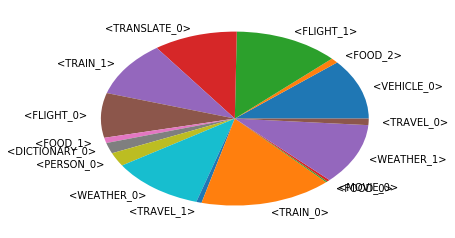

In [29]:
import collections
c = collections.Counter([i[0] for i in tr_answers])
print(c)
len(c)
plt.pie(c.values(), labels=c.keys());
sum(list(c.values()))

Counter({'<FLIGHT_0>': 440, '<VEHICLE_0>': 320, '<TRAIN_1>': 320, '<WEATHER_0>': 271, '<WEATHER_1>': 271, '<FLIGHT_1>': 250, '<TRANSLATE_0>': 240, '<PERSON_0>': 88, '<DICTIONARY_0>': 80, '<TRAIN_0>': 80, '<TRAVEL_0>': 60, '<FOOD_2>': 56, '<MOVIE_0>': 55, '<FOOD_1>': 44, '<TRAVEL_1>': 36, '<FOOD_0>': 30})


2641

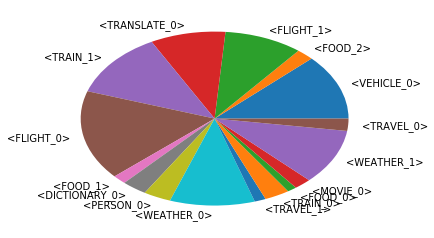

In [30]:
c = collections.Counter([i[0] for i in te_answers])
print(c)
plt.pie(c.values(), labels=c.keys());
sum(list(c.values()))

In [31]:
API_SLOTS.keys()

dict_keys(['<VEHICLE_0>', '<FOOD_2>', '<FLIGHT_1>', '<TRANSLATE_0>', '<TRAIN_1>', '<DICTIONARY_0>', '<FOOD_1>', '<PERSON_0>', '<WEATHER_0>', '<FOOD_0>', '<TRAVEL_1>', '<TRAIN_0>', '<FLIGHT_0>', '<MOVIE_0>', '<WEATHER_1>', '<TRAVEL_0>'])

In [32]:
c = Counter("".join(tr_sentences + te_sentences))
len(c)

2399

In [33]:
def update_vocab(lst):
    lst = set([i for i in lst if i not in char2idx])
    print(dict(zip(lst, range(len(char2idx), len(char2idx)+len(lst)))))
    char2idx.update(dict(zip(lst, range(len(char2idx), len(char2idx)+len(lst)))))
char2idx = {"<PAD>": 0, "<SOS>": 1, "<EOS>": 2, "<UNK>":3, "<SPA>": 4}
update_vocab(c.keys())
for k, v in API_SLOTS.items():
    lst = [k]
    lst.extend(v)
    update_vocab(lst)
#char2idx
idx2char = dict(zip(char2idx.values(), char2idx.keys()))
#idx2char
vocab_size = len(char2idx)
vocab_size

{'兮': 1216, '澳': 1217, '琥': 541, '船': 2019, '尤': 5, '礼': 2275, 'O': 6, '香': 1219, '丘': 446, '缨': 7, '你': 8, '干': 1222, '入': 1860, '伦': 1223, '锤': 1224, '培': 9, '收': 10, '茂': 2182, '打': 14, '何': 12, '牡': 13, '期': 2020, '杂': 1598, '柯': 1227, '远': 1642, '哀': 15, '烂': 1228, '濮': 1229, '乘': 1230, '洲': 1232, '应': 16, '代': 1234, 'K': 2269, '猕': 1235, '拣': 672, '越': 416, '吁': 1236, '济': 1237, '以': 17, '焰': 18, '几': 1238, '薪': 19, '隆': 20, '骇': 1239, '至': 21, '踽': 2023, '坚': 1240, '花': 1241, '驰': 22, '插': 23, '雨': 1243, '他': 1244, '彤': 24, '长': 1245, '森': 25, '哥': 26, '控': 1247, '十': 1248, '倾': 1249, '嚎': 220, '停': 1320, '芯': 29, '狼': 1785, '衢': 30, '菇': 1251, '啤': 1252, '很': 31, '确': 451, '导': 32, '乌': 2036, '笛': 33, '翅': 1826, '校': 1426, '歧': 1254, '讨': 1255, '盖': 35, 'B': 37, '烨': 38, '潜': 1256, '糯': 39, '逐': 40, '盾': 2026, '田': 41, '锯': 1986, '检': 42, '金': 43, '第': 1259, '雯': 44, '熙': 1260, '骞': 46, '律': 47, '融': 1261, '材': 48, '职': 1263, '今': 1264, '假': 49, '状': 1315, '虎': 1428, '霓': 1265,

2433

In [34]:
def restore_text(ids, source_text=""):
    return "".join(idx2char[_id] if _id < vocab_size else source_text[_id-vocab_size] for _id in ids)

In [35]:
vocab_size

2433

In [36]:
train_sid = [list(map(lambda t:char2idx[t], s)) for s in train_set[0]]
len(train_sid)
train_sid[0]

[1788, 2391, 973, 21, 709, 2160, 132, 1203, 2243, 1119, 2322]

In [37]:
def resolve(s):
    r = []
    api,*params = s
    params_default = API_SLOTS[api]
    r.append(char2idx[s[0]])
    for i, p in enumerate(params):
        r.append(char2idx["<SPA>"])
        if p is None:
            r.append(char2idx[params_default[i]])
        else:
            r.extend(char2idx[k] if k in char2idx else char2idx['<UNK>'] for k in p)
    return r
train_aid = [resolve(s) for s in train_set[1]]
len(train_aid)
train_aid[0]
train_set[1][0]

['<TRANSLATE_0>', '道述至幸资', '汉语']

In [38]:
train_set[1][1], resolve(train_set[1][1])

(['<TRAIN_1>', 'T4157'], [2415, 4, 636, 2222, 2144, 1404, 842])

In [39]:
char2idx['<SPA>']

4

In [40]:
char2idx['<TRAIN_0>'], char2idx['<TRAIN_1>'], char2idx['<TTYPE_DEFAULT>']

(2426, 2415, 2425)

In [41]:
char2idx['<TTYPE_DEFAULT>']

2425

In [42]:
train_aid[1]

[2415, 4, 636, 2222, 2144, 1404, 842]

In [43]:
[restore_text(ids) for ids in train_aid[:100]]

['<TRANSLATE_0><SPA>道述至幸资<SPA>汉语',
 '<TRAIN_1><SPA>T4157',
 '<WEATHER_1><SPA>郴州市<SPA>星期四',
 '<FLIGHT_1><SPA>CD8006',
 '<WEATHER_1><SPA>盐城市<SPA>劳动节',
 '<FLIGHT_1><SPA>HI4050',
 '<TRAVEL_1><SPA>鹰潭',
 '<FLIGHT_1><SPA>MX7307',
 '<WEATHER_0><SPA>曲靖市<SPA>明天下午',
 '<WEATHER_1><SPA>宁德市<SPA>白天',
 '<TRAIN_0><SPA>月末<SPA>常州市<SPA>宁波市<SPA>动车',
 '<WEATHER_0><SPA>西安市<SPA>星期日',
 '<PERSON_0><SPA>黄雅莉',
 '<TRAIN_0><SPA><DATE_DEFAULT><SPA>西宁市<SPA>巴中市<SPA>高铁',
 '<WEATHER_1><SPA>清远市<SPA>明天下午',
 '<TRANSLATE_0><SPA>重气八<SPA>德语',
 '<FLIGHT_1><SPA>HO4303',
 '<FLIGHT_0><SPA>星期五<SPA>日照市<SPA>温州市<SPA><FTYPE_DEFAULT>',
 '<WEATHER_0><SPA>怀化市<SPA>最近三天',
 '<VEHICLE_0><SPA>八号<SPA>三门峡市',
 '<TRAIN_1><SPA>K34',
 '<DICTIONARY_0><SPA>杞人忧天',
 '<WEATHER_1><SPA>运城市<SPA>明天白天',
 '<WEATHER_1><SPA>忻州市<SPA>最近几天',
 '<TRAIN_0><SPA><DATE_DEFAULT><SPA>温州市<SPA>银川市<SPA>高铁',
 '<TRAIN_0><SPA><DATE_DEFAULT><SPA>平凉市<SPA>东营市<SPA>火车',
 '<TRAIN_0><SPA><DATE_DEFAULT><SPA>普洱市<SPA>海口市<SPA>火车',
 '<WEATHER_1><SPA>郴州市<SPA>元宵节',
 '<VEHICLE_0><SPA>五号<SPA>宜

In [44]:
test_aid =  [resolve(s) for s in test_set[1]]

In [45]:
batch_size_value = 64
num_batches_value = len(train_sid) // batch_size_value

In [46]:
num_batches_value

4900

In [47]:
def batch(inputs, max_sequence_length=None):
    
    sequence_lengths = [len(seq) for seq in inputs]
    batch_size = len(inputs)
    
    if max_sequence_length is None:
        max_sequence_length = max(sequence_lengths)
    
    inputs_batch_major = np.zeros(shape=[batch_size, max_sequence_length], dtype=np.int32) # == PAD
    
    for i, seq in enumerate(inputs):
        for j, element in enumerate(seq):
            inputs_batch_major[i, j] = element

    # [batch_size, max_time] -> [max_time, batch_size]
    inputs_time_major = inputs_batch_major.swapaxes(0, 1)

    return inputs_time_major, sequence_lengths

In [48]:
test_sid = [list(map(lambda t:char2idx[t] if t in char2idx else char2idx["<UNK>"], s)) for s in test_set[0]]
test_aid = [resolve(s) for s in test_set[1]]
len(test_sid), len(test_aid)

(2641, 2641)

In [49]:
t = next_feed(dataset=(test_sid, test_aid), batch_size=len(test_sid), shuffle=True)
t[encoder_inputs][:10]
[restore_text(i) for i in t[encoder_inputs].T[:10]]
[restore_text(i) for i in t[decoder_targets].T[:10]]

NameError: name 'next_feed' is not defined

In [55]:
batch_size_value

64

## Model

In [56]:
max_decoder_length = 36
max_encoder_length = 30

input_embedding_size = 128
encoder_hidden_units = 128

decoder_hidden_units = encoder_hidden_units * 2

In [57]:
tf.reset_default_graph()

In [58]:
encoder_inputs = tf.placeholder(dtype=tf.int32, shape=[None, None], name="encoder_inputs") # (time, batch)
encoder_inputs_length = tf.placeholder(dtype=tf.int32, shape=[None], name="encoder_inputs_length") # sentence length for each batch

decoder_targets = tf.placeholder(dtype=tf.int32, shape=[None, None], name="decoder_targets") # (decoder_lengths, batch)
decoder_lengths = tf.placeholder(dtype=tf.int32, shape=[None], name="decoder_lengths")
decoder_lengths = encoder_inputs_length + 3


In [59]:
embeddings = tf.Variable(initial_value=tf.random_uniform([vocab_size, input_embedding_size], -1, 1), name="embeddings")

encoder_inputs_embedded = tf.nn.embedding_lookup(embeddings, encoder_inputs)  # (time, batch, input_embedding_size)

In [60]:
encoder_cell = tf.nn.rnn_cell.LSTMCell(encoder_hidden_units)

((encoder_fw_outputs, encoder_bw_outputs), (encoder_fw_final_state, encoder_bw_final_state)) = (
    tf.nn.bidirectional_dynamic_rnn(encoder_cell, encoder_cell,
                                    encoder_inputs_embedded, sequence_length=encoder_inputs_length, dtype=tf.float32, time_major=True,))

In [61]:
encoder_outputs = tf.concat([encoder_fw_outputs, encoder_bw_outputs], -1) # (time, batch, 128+128=256)

encoder_final_state_c = tf.concat([encoder_fw_final_state.c, encoder_bw_final_state.c], -1) # (batch, 256)
encoder_final_state_h = tf.concat([encoder_fw_final_state.h, encoder_bw_final_state.h], -1) # (batch, 256)

encoder_final_state = tf.nn.rnn_cell.LSTMStateTuple(c=encoder_final_state_c, h=encoder_final_state_h) # (batch, 256)

In [62]:
decoder_cell = tf.nn.rnn_cell.LSTMCell(decoder_hidden_units)

encoder_max_time, batch_size = tf.unstack(tf.shape(encoder_inputs))

In [63]:
attention_units = decoder_hidden_units

encoder_outputs = tf.transpose(encoder_outputs, [1, 0, 2]) # (batch, time, 256)
attention_mechanism = tf.contrib.seq2seq.BahdanauAttention(attention_units, encoder_outputs, memory_sequence_length=encoder_inputs_length)

decoder_cell = tf.contrib.seq2seq.AttentionWrapper(
    decoder_cell, attention_mechanism,
    attention_layer_size=attention_units)


In [64]:
# W = tf.Variable(tf.random_uniform([decoder_hidden_units, vocab_size], -1, 1), dtype=tf.float32)
# b = tf.Variable(tf.zeros([vocab_size]), dtype=tf.float32)

In [65]:
sos_time_slice = tf.ones([batch_size], dtype=tf.int32, name="sos")
pad_time_slice = tf.zeros([batch_size], dtype=tf.int32, name="pad")

sos_step_embedded = tf.nn.embedding_lookup(embeddings, sos_time_slice)
pad_step_embedded = tf.nn.embedding_lookup(embeddings, pad_time_slice)
print(sos_step_embedded)
pad_step_embedded

Tensor("embedding_lookup_1:0", shape=(?, 128), dtype=float32)


<tf.Tensor 'embedding_lookup_2:0' shape=(?, 128) dtype=float32>

In [66]:
decoder_lengths = max_decoder_length

In [67]:
copy_weight = tf.get_variable('copy_weight', [encoder_hidden_units * 2, decoder_cell.output_size]) # (256, 256)
copy_weight

<tf.Variable 'copy_weight:0' shape=(256, 256) dtype=float32_ref>

In [68]:
encoder_outputs

<tf.Tensor 'transpose:0' shape=(?, ?, 256) dtype=float32>

In [69]:
encoder_inputs

<tf.Tensor 'encoder_inputs:0' shape=(?, ?) dtype=int32>

In [70]:
def loop_fn_initial():
    initial_elements_finished = (0 >= decoder_lengths)  # all False at the initial step
    initial_input = tf.concat([sos_step_embedded, tf.zeros([batch_size, decoder_hidden_units])], axis=1)
    print("initial_input", initial_input)
    initial_cell_state = decoder_cell.zero_state(batch_size, tf.float32).clone(
          cell_state=encoder_final_state)
    initial_cell_output = tf.zeros([vocab_size])#(tf.zeros((), dtype=tf.int32),tf.zeros([decoder_hidden_units]))
    initial_loop_state = None  # we don't need to pass any additional information
    return (initial_elements_finished,
            initial_input,
            initial_cell_state,
            initial_cell_output,
            initial_loop_state)

In [71]:
encoder_outputs

<tf.Tensor 'transpose:0' shape=(?, ?, 256) dtype=float32>

In [72]:
copy_weight

<tf.Variable 'copy_weight:0' shape=(256, 256) dtype=float32_ref>

In [73]:
tf.tensordot(encoder_outputs, copy_weight, [[2], [0]])

<tf.Tensor 'Tensordot:0' shape=(?, ?, 256) dtype=float32>

In [74]:
def loop_fn_transition(time, previous_output, previous_state, previous_loop_state):
    print(previous_output, previous_state) # (batch, 256) (batch, 256)
    #expand_cell_outputs = tf.expand_dims(previous_output, 1)
    generate_scores = tf.layers.dense(previous_output, units=vocab_size)  # batch_size * vocab_size
    # 得到每个单词的得分
    print(generate_scores)
    # encoder_outputs is batch_size * times * encoder_hidden_states
    # copy_weight is encoder_hidden_states * decoder_hidden_states, encoder_hidden_states == decoder_hidden_states??
    # copy_scores is batch_size * times * decoder_hidden_states
    copy_scores = tf.tensordot(encoder_outputs, copy_weight, [[2],[0]]) # (batch, time, 256)
    print(copy_weight, encoder_outputs, copy_scores.shape, )
    copy_scores = tf.nn.tanh(copy_scores)
    
    #copy_scores = tf.tensordot(copy_scores, previous_output, 1)
    
    # expend_cell_outputs is batch_size * 1 * decoder_hidden_states
    # copy_scores is batch_size * times
    copy_scores = tf.reduce_sum(copy_scores * tf.expand_dims(previous_output, 1), 2)   # (batch, time)
    
    mixed_score = tf.concat([generate_scores, copy_scores], 1)
    probs = tf.nn.softmax(mixed_score)
    prob_g = probs[:, :vocab_size]
    prob_c = probs[:, vocab_size:]    
    generate_scores = prob_g
    copy_scores = prob_c
    
    # mask is (B, L, V)
    mask = tf.one_hot(tf.transpose(encoder_inputs), vocab_size)
    
    result_score = generate_scores + tf.reduce_sum(mask * tf.expand_dims(copy_scores, 2), axis=1)
    print("result_score", result_score.shape)

    # choice one, move generate_scores to copy_scores
#    expanded_generate_scores = tf.expand_dims(generate_scores, 1) # (B,1,V)
#    actual_copy_scores = copy_scores + tf.reduce_sum(
#                            mask * expanded_generate_scores, 2)
#    actual_generate_scores = generate_scores - tf.reduce_sum(
#                            mask * expanded_generate_scores, 1)

    # choice two, move copy_scores to generate_scores
    '''
    expanded_copy_scores = tf.expand_dims(copy_scores, 2)
    acutual_generate_scores = generate_scores + tf.reduce_sum(
                                mask * expanded_copy_scores, 1)
    acutual_copy_scores = copy_scores - tf.reduce_sum(
                                mask * expanded_copy_scores, 2)
    '''

#    mix_scores = tf.concat([actual_generate_scores, actual_copy_scores], 1)
#    mix_scores = tf.nn.softmax(mix_scores, -1) # mix_scores is (B, V+L)

    # make sure mix_socres.shape is (B, V + encoder_max_seq_len)
#    padding_size = max_encoder_length - tf.shape(copy_scores)[1]
#    mix_scores = tf.pad(mix_scores, [[0, 0], [0, padding_size]])
    prediction = tf.argmax(result_score, axis=1, output_type=tf.int32) # (batch)
    mask = tf.cast(tf.equal(tf.expand_dims(prediction, 1), tf.transpose(encoder_inputs)), tf.float32) # (batch, time)
    mask_sum = tf.reduce_sum(mask, axis=1)
    mask = tf.where(tf.less(mask_sum, 1e-7), mask, mask / tf.expand_dims(mask_sum, 1)) # (batch, time)
    print("mask", mask)
    rou = mask * copy_scores # (batch, time)
    results = tf.reduce_sum(encoder_outputs * tf.expand_dims(rou, 2), 1) # (batch, 256)

    next_input = tf.nn.embedding_lookup(embeddings, prediction)
    print("next_input", next_input, results)
    result = tf.concat([next_input, results], axis=1)
    result.set_shape([tf.Dimension(None), input_embedding_size + decoder_hidden_units])
    print("final result shape", result)
    
    def get_next_input():
        return result
    
    #print(time)
    elements_finished = (time >= decoder_lengths) # this operation produces boolean tensor of [batch_size]
                                                  # defining if corresponding sequence has ended
    #print(elements_finished)
    finished = tf.reduce_all(elements_finished) # -> boolean scalar
    inputs = tf.cond(finished, lambda: tf.concat([pad_step_embedded, tf.zeros([batch_size, decoder_hidden_units])], axis=1), get_next_input)
    state = previous_state
    output = result_score
    print(inputs, output)
    loop_state = None

    return (elements_finished, 
            inputs,
            state,
            output,
            loop_state)

In [75]:
def loop_fn(time, previous_output, previous_state, previous_loop_state):
    if previous_state is None:    # time == 0
        assert previous_output is None and previous_state is None
        return loop_fn_initial()
    else:
        return loop_fn_transition(time, previous_output, previous_state, previous_loop_state)

In [76]:
decoder_outputs_ta, decoder_final_state, _ = tf.nn.raw_rnn(decoder_cell, loop_fn)

initial_input Tensor("rnn/concat:0", shape=(?, 384), dtype=float32)
Tensor("rnn/while/rnn/attention_wrapper/concat_2:0", shape=(?, 256), dtype=float32) AttentionWrapperState(cell_state=LSTMStateTuple(c=<tf.Tensor 'rnn/while/rnn/attention_wrapper/attention_wrapper/lstm_cell/add_1:0' shape=(?, 256) dtype=float32>, h=<tf.Tensor 'rnn/while/rnn/attention_wrapper/attention_wrapper/lstm_cell/mul_2:0' shape=(?, 256) dtype=float32>), attention=<tf.Tensor 'rnn/while/rnn/attention_wrapper/concat_2:0' shape=(?, 256) dtype=float32>, time=<tf.Tensor 'rnn/while/rnn/attention_wrapper/add:0' shape=() dtype=int32>, alignments=<tf.Tensor 'rnn/while/rnn/attention_wrapper/Softmax:0' shape=(?, ?) dtype=float32>, alignment_history=())
Tensor("rnn/while/dense/BiasAdd:0", shape=(?, 2433), dtype=float32)
<tf.Variable 'copy_weight:0' shape=(256, 256) dtype=float32_ref> Tensor("transpose:0", shape=(?, ?, 256), dtype=float32) (?, ?, 256)
result_score (?, 2433)
mask Tensor("rnn/while/Select:0", shape=(?, ?), dtype=

In [77]:
decoder_logits = decoder_outputs_ta.stack()

In [78]:
# decoder_outputs = decoder_outputs_ta.stack()
# decoder_max_steps, decoder_batch_size, decoder_dim = tf.unstack(tf.shape(decoder_outputs))
# decoder_outputs_flat = tf.reshape(decoder_outputs, (-1, decoder_dim))
# decoder_logits_flat = tf.add(tf.matmul(decoder_outputs_flat, W), b)
# decoder_logits = tf.reshape(decoder_logits_flat, (decoder_max_steps, decoder_batch_size, vocab_size))


In [79]:
decoder_prediction = tf.argmax(decoder_logits, 2, output_type=tf.int32)
decoder_prediction, decoder_targets

(<tf.Tensor 'ArgMax:0' shape=(?, ?) dtype=int32>,
 <tf.Tensor 'decoder_targets:0' shape=(?, ?) dtype=int32>)

In [80]:
class_precision = tf.divide(tf.count_nonzero(tf.equal(decoder_prediction[0, :], decoder_targets[0, :]), dtype=tf.int32),  tf.shape(decoder_targets)[1])
true_values = tf.not_equal(decoder_targets, char2idx["<PAD>"])
true_values = tf.logical_and(true_values, tf.not_equal(decoder_targets, char2idx["<SPA>"]))
true_values = tf.logical_and(true_values, tf.not_equal(decoder_targets, char2idx["<EOS>"]))
all_precision = tf.divide(tf.count_nonzero(tf.logical_and(tf.equal(decoder_prediction, decoder_targets), true_values), dtype=tf.int32),  tf.count_nonzero(true_values, dtype=tf.int32))
total_precision = tf.divide(tf.count_nonzero(tf.reduce_all(tf.equal(decoder_prediction, decoder_targets), axis=0), dtype=tf.int32),  tf.shape(decoder_targets)[1])

tf.summary.scalar("class_precision", class_precision)
tf.summary.scalar("all_precision", all_precision)
tf.summary.scalar("total_precision", total_precision)

<tf.Tensor 'total_precision:0' shape=() dtype=string>

In [81]:
decoder_logits

<tf.Tensor 'TensorArrayStack/TensorArrayGatherV3:0' shape=(?, ?, 2433) dtype=float32>

In [82]:
decoder_targets

<tf.Tensor 'decoder_targets:0' shape=(?, ?) dtype=int32>

In [83]:
stepwise_cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
    labels=decoder_targets,
    logits=decoder_logits,
)

loss = tf.reduce_mean(stepwise_cross_entropy)

tf.summary.scalar("loss", loss)

train_op = tf.train.AdamOptimizer().minimize(loss)
merge_op = tf.summary.merge_all()

In [84]:
def next_feed(dataset=(train_sid, train_aid), idx=0, batch_size=batch_size_value, shuffle=False):
    sid, aid = dataset
    if idx == 0 and shuffle:
        p_idx = np.arange(len(sid))
        np.random.shuffle(p_idx)
        sid = [sid[i] for i in p_idx]
        aid = [aid[i] for i in p_idx]
    a = [restore_text(i) for i in sid[idx*batch_size:(idx+1)*batch_size]]
    b = [restore_text(i) for i in aid[idx*batch_size:(idx+1)*batch_size]]
    #if sid == train_sid:
    #    for i, j in zip(a, b):
    #        print(i, j)
    encoder_inputs_, encoder_input_lengths_ = batch(sid[idx*batch_size:(idx+1)*batch_size])
    decoder_targets_, _ = batch(
        [(sequence) + [char2idx["<EOS>"]] + [char2idx["<PAD>"]] * 2 for sequence in aid[idx*batch_size:(idx+1)*batch_size]],max_sequence_length=max_decoder_length
    )
    return {
        encoder_inputs: encoder_inputs_,
        encoder_inputs_length: encoder_input_lengths_,
        decoder_targets: decoder_targets_,
    }
next_feed()

{<tf.Tensor 'decoder_targets:0' shape=(?, ?) dtype=int32>: array([[2412, 2415, 2431, ..., 2421, 2404, 2427],
        [   4,    4,    4, ...,    4,    4,    4],
        [2391,  636, 1051, ..., 2094, 1264, 2406],
        ...,
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]], dtype=int32),
 <tf.Tensor 'encoder_inputs:0' shape=(?, ?) dtype=int32>: array([[1788,  653, 1051, ..., 2094, 2085, 1333],
        [2391,  872, 1874, ..., 1874, 2261, 1620],
        [ 973,  636, 1154, ..., 1154, 2065, 1154],
        ...,
        [   0, 1284,    0, ...,    0, 1160,    0],
        [   0, 1154,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]], dtype=int32),
 <tf.Tensor 'encoder_inputs_length:0' shape=(?,) dtype=int32>: [11,
  15,
  13,
  14,
  14,
  14,
  7,
  11,
  12,
  10,
  15,
  9,
  8,
  12,
  14,
  8,
  11,
  13,
  10,
  8,
  8,
  7,
  14,
  14,
  10,
  14,
  14,


In [85]:
test_feed = next_feed(dataset=(test_sid, test_aid), batch_size=batch_size_value, shuffle=True)
test_feed[decoder_targets].shape

(36, 64)

## Training

### Test Code

In [84]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [85]:
fd = next_feed(batch_size=3, shuffle=False)

In [86]:
#sess.run(test_outputs, fd)

In [87]:
_, l = sess.run([train_op, loss], fd)
loss_, c_prec_, a_prec_, t_prec_, predict_ = sess.run([loss, class_precision, all_precision, total_precision, decoder_prediction], fd)
print('  minibatch loss: {}'.format(loss_))
print('  minibatch class precision: {}'.format(c_prec_))
print('  minibatch all precision: {}'.format(a_prec_))
print('  minibatch total precision: {}'.format(t_prec_))

for i, (inp, dect, pred) in enumerate(zip(fd[encoder_inputs].T, fd[decoder_targets].T, predict_.T)):                
    print('  sample {}:'.format(i + 1))
    print('    input     > {}'.format(restore_text(inp)))
    print('    target    > {}'.format(restore_text(dect)))
    print('    predicted > {}'.format(restore_text(pred, restore_text(inp))))

  minibatch loss: 7.409761905670166
  minibatch class precision: 0.0
  minibatch all precision: 0.18181818181818182
  minibatch total precision: 0.0
  sample 1:
    input     > 星期天湖州市会下雨吗<PAD><PAD><PAD><PAD><PAD>
    target    > <WEATHER_0><SPA>湖州市<SPA>星期天<EOS><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>
    predicted > 期期期州湖天天天天天天天天天天天天星星星星星星星天天天天天天天天天天天天
  sample 2:
    input     > 查一下航班IF3420<PAD><PAD><PAD><PAD>
    target    > <FLIGHT_1><SPA>IF3420<EOS><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>
    predicted > 33F33F3F3F3FFFFFFFFF2FF2FF2F2FF2F2F2
  sample 3:
    input     > 查一下最近三天荆州市的车辆限行
    target    > <VEHICLE_0><SPA>最近三天<SPA>荆州市<EOS><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>
    predicted > 三三三三三荆荆州天天天天天荆荆荆荆荆荆荆荆荆荆荆荆荆荆荆荆

In [522]:
sess.run([tf.count_nonzero(true_values)], fd)

[29]

In [523]:
sess.run([true_values, tf.count_nonzero(true_values, dtype=tf.int32), tf.count_nonzero(tf.logical_and(tf.equal(decoder_prediction, decoder_targets), true_values), dtype=tf.int32)], fd)

[array([[ True,  True,  True],
        [False, False, False],
        [ True,  True,  True],
        [ True, False,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [False,  True,  True],
        [ True, False,  True],
        [ True,  True,  True],
        [False,  True,  True],
        [False,  True,  True],
        [False, False, False],
        [False,  True,  True],
        [False,  True,  True],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        

### True Training

In [281]:
log_path = "copynet_new_adam_test_add_softmax"

In [282]:
!rm -rf $log_path

In [283]:
sess = tf.InteractiveSession()
train_writer = tf.summary.FileWriter(os.path.join(log_path, "train"), graph=sess.graph)
test_writer = tf.summary.FileWriter(os.path.join(log_path, "test"))
saver = tf.train.Saver()

In [284]:
sess.run(tf.global_variables_initializer())

loss_track = []
for epoch in range(100):
    for i in range(num_batches_value):
        fd = next_feed(idx=i)
        _, summary = sess.run([train_op, merge_op], fd)
        total_epoch = epoch * num_batches_value + i
        train_writer.add_summary(summary, total_epoch)

        if total_epoch % 200 == 0:
            saver.save(sess, os.path.join(log_path, "model-%s.ckpt" % total_epoch), global_step=total_epoch)
            print('epoch {}, batch {}'.format(epoch, i))
            loss_, c_prec_, a_prec_, t_prec_, predict_ = sess.run([loss, class_precision, all_precision, total_precision, decoder_prediction], fd)
            print('  minibatch loss: {}'.format(loss_))
            print('  minibatch class precision: {}'.format(c_prec_))
            print('  minibatch all precision: {}'.format(a_prec_))
            print('  minibatch total precision: {}'.format(t_prec_))
            
            for i, (inp, dect, pred) in enumerate(zip(fd[encoder_inputs].T, fd[decoder_targets].T, predict_.T)):                
                if i >= 3:
                    break
                print('  sample {}:'.format(i + 1))
                print('    input     > {}'.format(restore_text(inp)))
                print('    target    > {}'.format(restore_text(dect)))
                print('    predicted > {}'.format(restore_text(pred, restore_text(inp))))
                
            print()
            test_feed =  next_feed(dataset=(test_sid[:1000], test_aid[:1000]), batch_size=1000, shuffle=True)
            summary, loss_, c_prec_, a_prec_, t_prec_, predict_ = sess.run([merge_op, loss, class_precision, all_precision, total_precision, decoder_prediction], test_feed)
            test_writer.add_summary(summary, total_epoch)
            print('  test loss: {}'.format(loss_))
            print('  test class precision: {}'.format(c_prec_))
            print('  test all precision: {}'.format(a_prec_))
            print('  test total precision: {}'.format(t_prec_))
            
            for i, (inp, dect, pred) in enumerate(zip(test_feed[encoder_inputs].T, test_feed[decoder_targets].T, predict_.T)):                
                if i >= 5:
                    break
                print('  sample {}:'.format(i + 1))
                print('    input     > {}'.format(restore_text(inp)))
                print('    target    > {}'.format(restore_text(dect)))
                print('    predicted > {}'.format(restore_text(pred, restore_text(inp))))
                
            print()
            print()
            

epoch 0, batch 0
  minibatch loss: 7.796303749084473
  minibatch class precision: 0.0
  minibatch all precision: 0.06756756756756757
  minibatch total precision: 0.0
  sample 1:
    input     > 两天以后从榆林市开往阳泉市的高铁<PAD>
    target    > <TRAIN_0><SPA>两天以后<SPA>榆林市<SPA>阳泉市<SPA>高铁<EOS><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>
    predicted > 市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市
  sample 2:
    input     > 查一下保山市到玉林市的西部航空航班
    target    > <FLIGHT_0><SPA><DATE_DEFAULT><SPA>保山市<SPA>玉林市<SPA>西部航空<EOS><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>
    predicted > 市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市市
  sample 3:
    input     > 火车C2555的停靠站<PAD><PAD><PAD><PAD><PAD><PAD>
    target    > <TRAIN_1><SPA>C2555<EOS><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>
    predicted > <PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><

  test loss: 6.981564044952393
  test class precision: 0.0
  test all precision: 0.4993707173821843
  test total precision: 0.0
  sample 1:
    input     > 元宵节赤峰市的空气质量如何<PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>
    target    > <WEATHER_1><SPA>赤峰市<SPA>元宵节<EOS><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>
    predicted > 元元赤峰市市<PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>
  sample 2:
    input     > 火车T1107什么时候到娄底市<PAD><PAD><PAD><PAD><PAD><PAD><PAD>
    target    > <TRAIN_1><SPA>T1107<EOS><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>
    predicted > 车TT1107<PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>
  sa

epoch 0, batch 1000
  minibatch loss: 6.933653831481934
  minibatch class precision: 0.0
  minibatch all precision: 0.7564655172413793
  minibatch total precision: 0.0
  sample 1:
    input     > 火车C9019的停靠站<PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>
    target    > <TRAIN_1><SPA>C9019<EOS><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>
    predicted > 火车C9019<PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>
  sample 2:
    input     > 明天白天广州市的限行尾号<PAD><PAD><PAD><PAD><PAD><PAD><PAD>
    target    > <VEHICLE_0><SPA>明天白天<SPA>广州市<EOS><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>
    predicted > 明明明天白天天广州市市<PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD

  test loss: 6.921260833740234
  test class precision: 0.029
  test all precision: 0.6708152705915257
  test total precision: 0.0
  sample 1:
    input     > 先社限述级虽翻译成俄语是什么<PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>
    target    > <TRANSLATE_0><SPA>先社限述级虽<SPA>俄语<EOS><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>
    predicted > 先<SPA>先先限述级虽俄俄语语<PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>
  sample 2:
    input     > 元宵节赤峰市的空气质量<PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>
    target    > <WEATHER_1><SPA>赤峰市<SPA>元宵节<EOS><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>
    predicted > <DICTIONARY_0><SPA>赤峰市市<PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PA

epoch 0, batch 2000
  minibatch loss: 6.911360740661621
  minibatch class precision: 0.015625
  minibatch all precision: 0.768595041322314
  minibatch total precision: 0.0
  sample 1:
    input     > 火车D577的停靠站<PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>
    target    > <TRAIN_1><SPA>D577<EOS><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>
    predicted > <DICTIONARY_0><SPA>D5777<PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>
  sample 2:
    input     > 潮州市十五的空气质量如何<PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>
    target    > <WEATHER_1><SPA>潮州市<SPA>十五<EOS><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>
    predicted > <DICTIONARY_0><SPA>潮州市市<PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>

KeyboardInterrupt: 

## Test

In [ ]:
def build_feed(sents):
    ids = [list(map(lambda t:char2idx[t] if t in char2idx else char2idx['<UNK>'], s)) for s in sents]
    encoder_inputs_, encoder_inputs_length_ = batch(ids)
    return {
        encoder_inputs: encoder_inputs_,
        encoder_inputs_length: encoder_inputs_length_,
    }

In [ ]:
test_set[0]

In [ ]:
test_sid = [list(map(lambda t:char2idx[t] if t in char2idx else char2idx["<UNK>"], s)) for s in test_set[0]]
len(test_sid)

In [ ]:
test_sid

In [ ]:
build_feed(test_set[0])

In [ ]:
fd = build_feed(test_set[0])
predict_ = sess.run(decoder_prediction, fd)
[restore_text(t) for t in predict_.T]

In [ ]:
[restore_text(t) for t in test_aid]

In [ ]:
fd = build_feed(["中秋节玉西区天气如何？",
                 "正山市元宵节天气怎么样？",
                 "中秋节路西区天气如何？",
                 "中秋节路东区天气如何？",
                 "中秋节新平区天气如何？",
                 "成都市元宵节的天气如何？",
                 "成都市天气翻译成日语",
                ])
predict_ = sess.run(decoder_prediction, fd)
[restore_text(t) for t in predict_.T]

In [ ]:
a = np.arange(60).reshape(3,4,5)
b = np.arange(15).reshape(3,1,5)

In [ ]:
a, b

In [ ]:
a*b

In [90]:
a = np.random.rand(2,3,4)
a

array([[[0.71520231, 0.9721203 , 0.04890048, 0.90587246],
        [0.03783126, 0.9188863 , 0.315908  , 0.64325253],
        [0.94687209, 0.1538238 , 0.16628106, 0.2930024 ]],

       [[0.87707155, 0.98311214, 0.52783293, 0.8295576 ],
        [0.50324982, 0.90467176, 0.60805724, 0.20799108],
        [0.20732186, 0.89037971, 0.55928913, 0.66128097]]])

In [91]:
b = np.random.rand(2, 4)
b

array([[0.34227509, 0.47654198, 0.28753075, 0.64747214],
       [0.09445874, 0.9548652 , 0.11522992, 0.76189426]])

In [104]:
np.tensordot(a, b, (2,1))

array([[[1.30863964, 1.69161478],
        [0.95815795, 1.40747851],
        [0.63491604, 0.47871874]],

       [[1.45757758, 1.71444396],
        [0.91286753, 1.13990953],
        [1.08423825, 1.43804898]]])

In [98]:
np.sum(a*np.expand_dims(b, 1),axis=2)

array([[1.30863964, 0.95815795, 0.63491604],
       [1.71444396, 1.13990953, 1.43804898]])

In [412]:
a = tf.placeholder('float32', shape=[None, 100])
b = tf.placeholder('float32', shape=[100, 300])
result_tensordot = tf.tensordot(a, b, axes=[[1], [0]])
result_tensordot.get_shape()  # TensorShape(None)
result_tensordot.get_shape().as_list()  # Error


[None, 300]

In [413]:
a = tf.placeholder('float32', shape=[None, 100])
b = tf.placeholder('float32', shape=[100, 300])
result_tensordot = tf.tensordot(a, b, axes=1)
result_tensordot.get_shape()  # TensorShape(None)
result_tensordot.get_shape().as_list()  # Error

ValueError: as_list() is not defined on an unknown TensorShape.